In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import scipy as sp
import pandas as pd
import os

# Approach-1 Parth Bhalodiya 20480979

In [226]:
class SensorData:
     
    def __init__(self, csv_file_path):

        # Load the CSV file and parse the data using numpy's genfromtxt function
        parsed_accel_log_data = np.genfromtxt(csv_file_path, delimiter=',', 
                              dtype=str, encoding=None, skip_header=1, unpack=True)
        self.data(*parsed_accel_log_data)

    def data(self, time, x, y, z, mag):
        # Convert the parsed data to the appropriate data types and assign them to class attributes
        self.time = time.astype(float) # timestamps are in milliseconds
        
        self.x = x.astype(float)
        self.y = y.astype(float)
        self.z = z.astype(float)
   
        # Calculate the magnitude of the signal
        self.mag = mag.astype(float)
        
        # Create placeholders for processed data
        self.x_p = None
        self.y_p = None
        self.z_p = None
        self.mag_p = None

## Gesture Data Loading

In [227]:
# Load Data
def load_data():
    root_path = "./"

    # Function to get subdirectories within a root directory
    def get_subdirectories(root_path):
        return [name for name in os.listdir(root_path)
                if os.path.isdir(os.path.join(root_path, name))]
    
    # Function to find CSV filenames within a directory
    def find_csv_filenames( path_to_dir):
        filenames = os.listdir(path_to_dir)
        return [ filename for filename in filenames
                if filename.endswith( ".csv" )]
    
    # Get list of subdirectories in the root path
    sub_dir_list = get_subdirectories(root_path)

    # Set of default gesture names
    DEFAULT_GESTURES_NAME = set(['circle', 'wave', 'go', 'come'])

    # Dictionary to map gestures to trial signals
    gesture_trial_map = dict()

    # Iterate through subdirectories
    for dir in sub_dir_list:
        # Check if the subdirectory corresponds to a default gesture name
        if dir.split(" ")[0] in DEFAULT_GESTURES_NAME:
            # Get the path to the trials of gestures
            path_to_trails_of_gestures = os.path.join(root_path, dir)
            # Find CSV filenames within the subdirectory
            trial_list = find_csv_filenames(path_to_trails_of_gestures)
            # Check if the gesture is not already in the map
            if dir.split(" ")[0] not in gesture_trial_map:
                gesture_trial_map[dir.split(" ")[0]] = list()
            # Iterate through CSV files and create trial signals
            for csv_file in trial_list:
                csv_file_path = os.path.join(path_to_trails_of_gestures, csv_file)
                trial_signal = SensorData(csv_file_path)
                gesture_trial_map[dir.split(" ")[0]].append(trial_signal)
    return gesture_trial_map

# Call the load_data() function to load the gesture data into the gesture_trial_map
gesture_trial_map = load_data()

2145
2043
2004
2004
2004
2004
2004
2004
2004
1994
1994
1810
1810
1810
1810
1810
1810
1810
1810
1771
1771
1771
1771
1771
1771
1749
1749
1749
1749
1749
1749
1749
1749
1665
1665
1522
1522
1522
1522
1522
1522


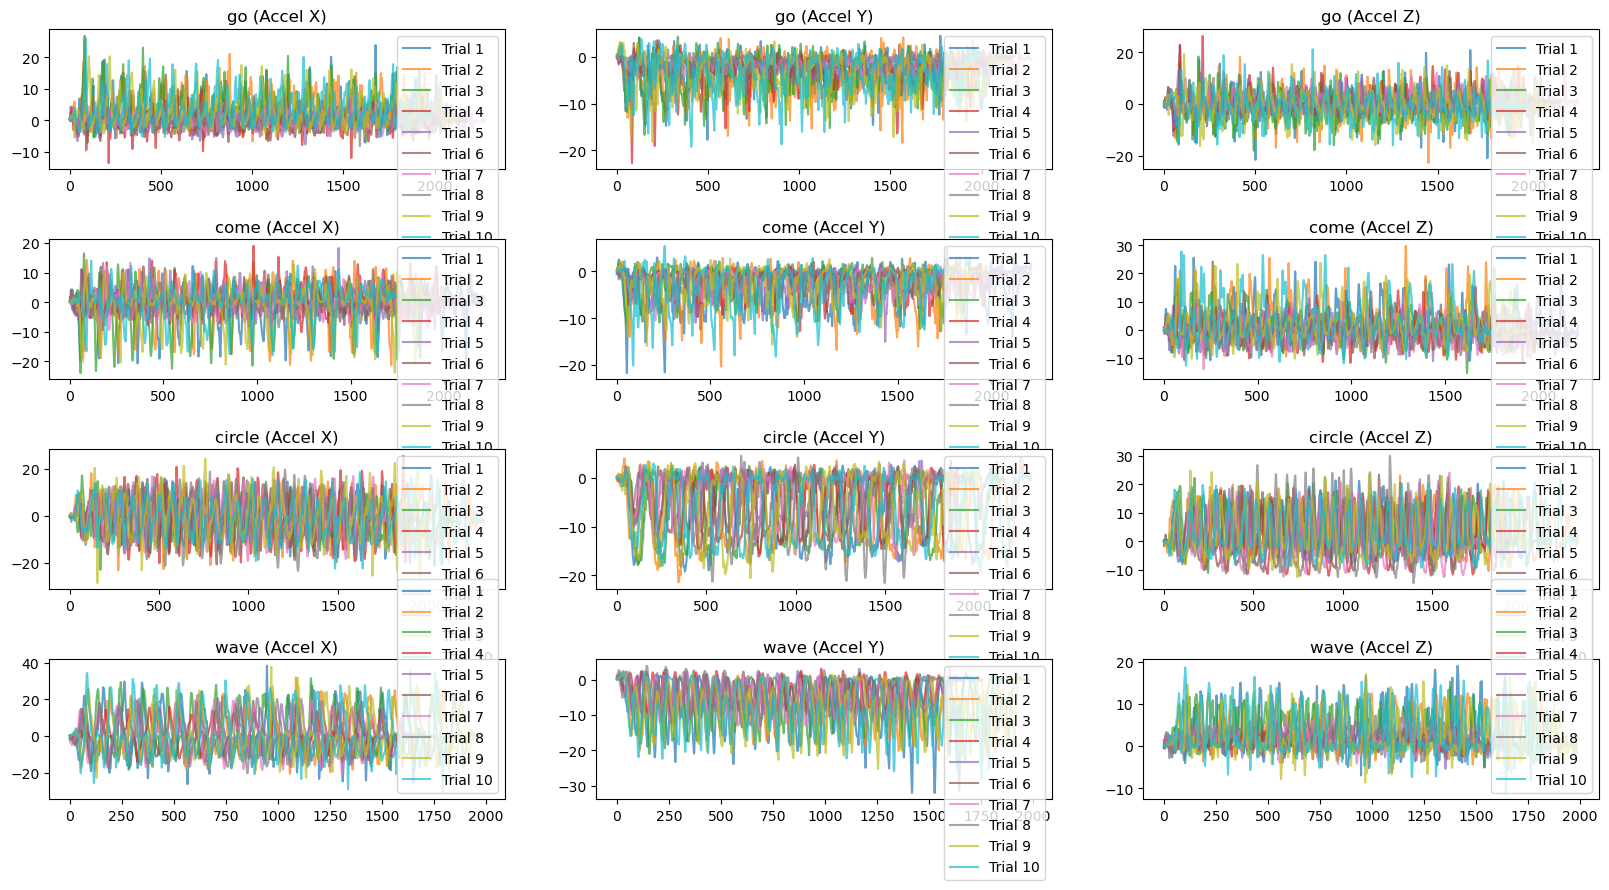

In [228]:
# Create a figure with a grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(20,10))
fig.subplots_adjust(hspace=0.5)

# Initialize variables
index = 0
n_x = 10000 

# Iterate over gesture_trial_map
for gesture_name, trials in gesture_trial_map.items():
    trial_num = 1
    # Iterate over trials for each gesture
    for trial in trials:
        # Plot accelerometer data for X, Y, and Z axes
        axes[index][0].plot(trial.x, alpha=0.7, label="Trial {}".format(trial_num))
        axes[index][1].plot(trial.y, alpha=0.7, label="Trial {}".format(trial_num))
        axes[index][2].plot(trial.z, alpha=0.7, label="Trial {}".format(trial_num))

        # Increment trial number and update n_x if necessary
        trial_num = trial_num + 1
        n_x = n_x if n_x < len(trial.x) else len(trial.x)
        
    # Set titles and legends for each subplot
    axes[index][0].set_title(gesture_name + " (Accel X)")
    axes[index][0].legend()
    
    axes[index][1].set_title(gesture_name + " (Accel Y)")
    axes[index][1].legend()
    
    axes[index][2].set_title(gesture_name + " (Accel Z)")
    axes[index][2].legend()

    # Move to the next row of subplots
    index = index + 1


In [229]:
# Filter of window size 5

# Function to apply a mean filter to a signal
def preprocess_signal(s):
    mean_filter_window_size = 10
    processed_signal = np.convolve(s, np.ones((mean_filter_window_size,))/mean_filter_window_size, mode='valid')
    return processed_signal

# Function to preprocess a trial
def preprocess_trial(trial):
    # Store original data in previous variables
    trial.x_p = trial.x
    trial.y_p = trial.y
    trial.z_p = trial.z
    trial.mag_p = trial.mag
    
    # Update data by removing the first and last 25 samples (preprocessing window)
    trial.x = trial.x[25:-50]
    trial.y = trial.y[25:-50]
    trial.z = trial.z[25:-50]
    trial.mag = trial.mag[25:-50]
    trial.time = trial.time[25:-50]
    
    # Apply mean filtering to the updated data
    trial.x = preprocess_signal(trial.x)
    trial.y = preprocess_signal(trial.y)
    trial.z = preprocess_signal(trial.z)
    trial.mag = preprocess_signal(trial.mag)
    
    # Subtract the mean from the filtered data
    trial.x = trial.x - trial.x.mean()
    trial.y = trial.y - trial.y.mean()
    trial.z = trial.z - trial.z.mean()
    trial.mag = trial.mag - trial.mag.mean()

# Iterate over gesture_trial_map
for gesture_name, trials in gesture_trial_map.items():
    for trial in trials:
        preprocess_trial(trial)


2061
1959
1920
1920
1920
1920
1920
1920
1920
1910
1910
1726
1726
1726
1726
1726
1726
1726
1726
1687
1687
1687
1687
1687
1687
1665
1665
1665
1665
1665
1665
1665
1665
1581
1581
1438
1438
1438
1438
1438
1438


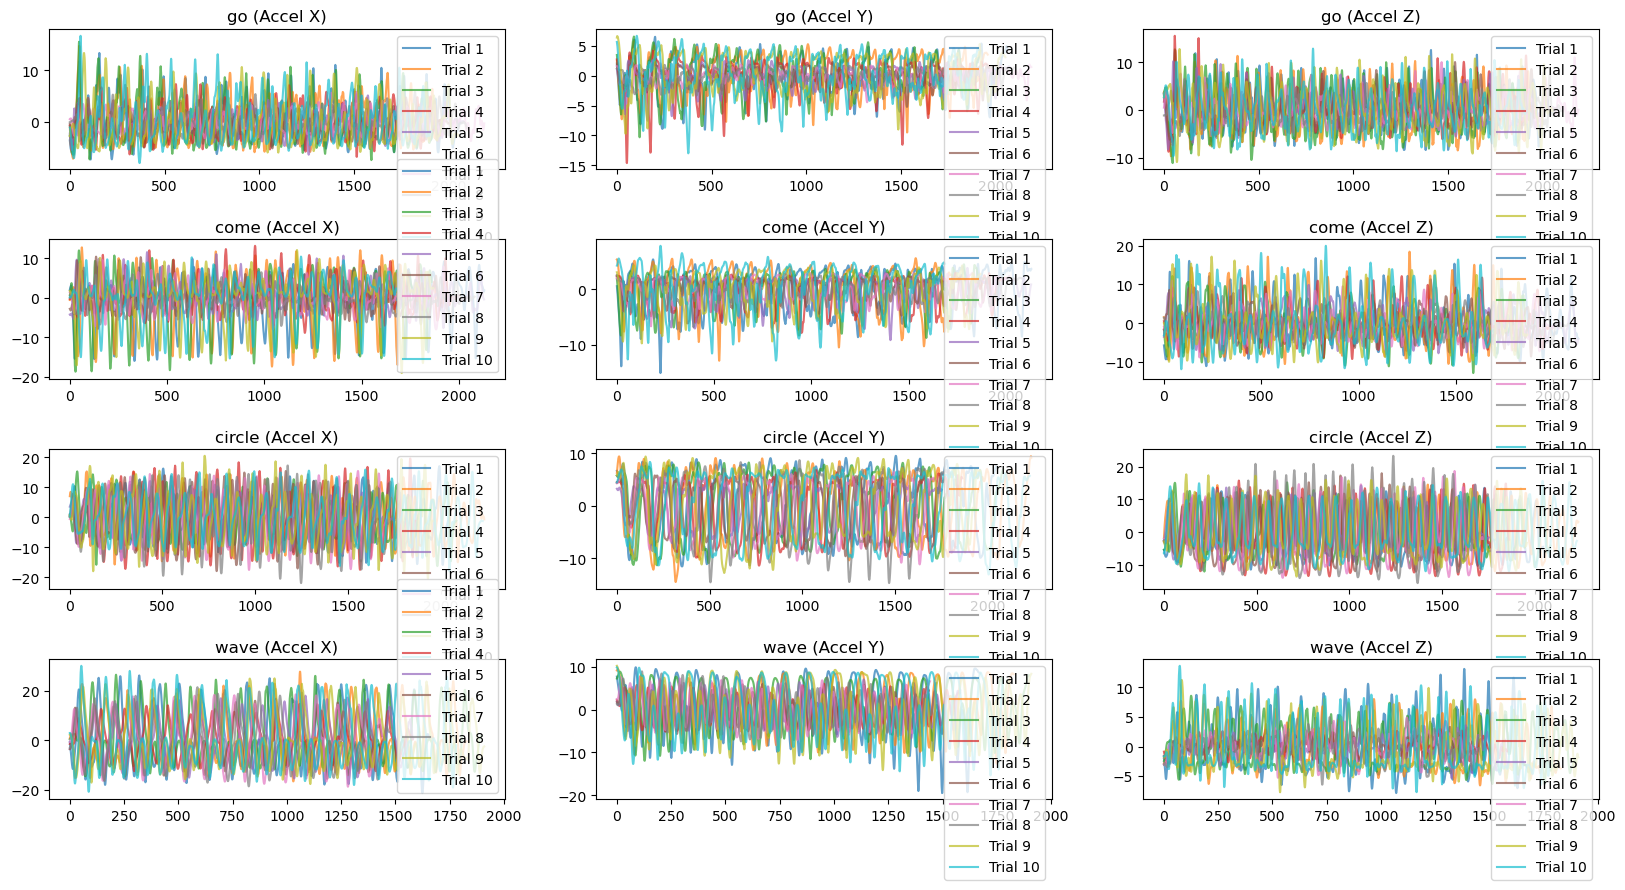

In [230]:
# Create a figure with a grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(20,10))
fig.subplots_adjust(hspace=0.5)

# Initialize variables
index = 0
n_x = 10000 

# Iterate over gesture_trial_map
for gesture_name, trials in gesture_trial_map.items():
    trial_num = 1
    # Iterate over trials for each gesture
    for trial in trials:
        # Plot accelerometer data for X, Y, and Z axes
        axes[index][0].plot(trial.x, alpha=0.7, label="Trial {}".format(trial_num))
        axes[index][1].plot(trial.y, alpha=0.7, label="Trial {}".format(trial_num))
        axes[index][2].plot(trial.z, alpha=0.7, label="Trial {}".format(trial_num))

        # Increment trial number and update n_x if necessary
        trial_num = trial_num + 1
        n_x = n_x if n_x < len(trial.x) else len(trial.x)
        
    # Set titles and legends for each subplot
    axes[index][0].set_title(gesture_name + " (Accel X)")
    axes[index][0].legend()
    
    axes[index][1].set_title(gesture_name + " (Accel Y)")
    axes[index][1].legend()
    
    axes[index][2].set_title(gesture_name + " (Accel Z)")
    axes[index][2].legend()

    # Move to the next row of subplots
    index = index + 1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


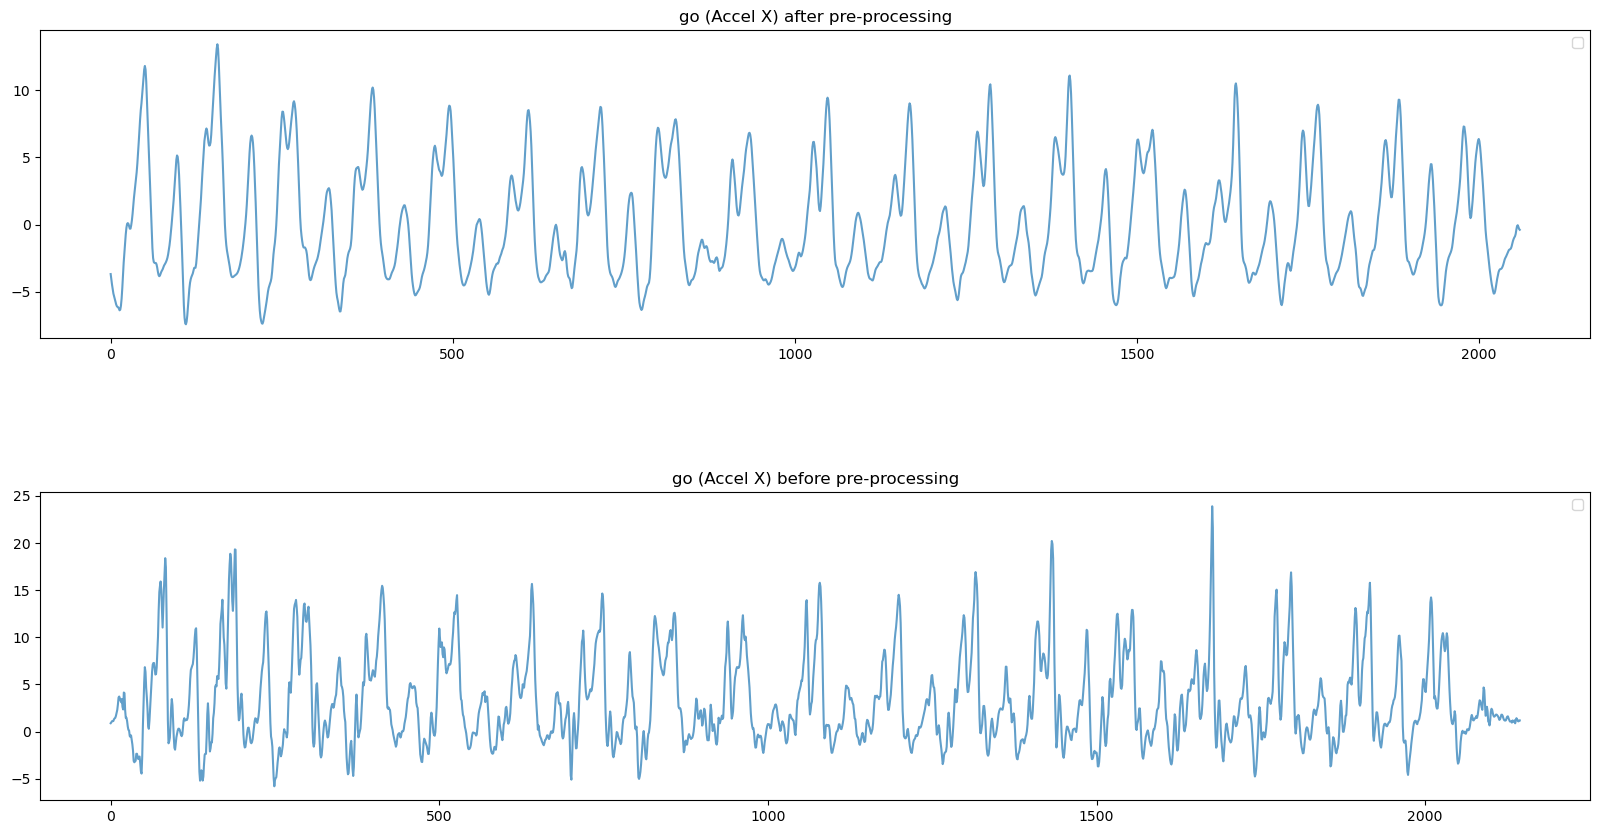

In [231]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)

# Save the figure as 'Comparison.png' with a DPI of 300 and tight bounding box
plt.savefig('Comparison.png', dpi=300, bbox_inches='tight')

for gesture_name, trials in gesture_trial_map.items():
    trial_num = 1
    for trial in trials:
        # Plot the pre-processed x signal on the first subplot
        axes[0].plot(trial.x, alpha=0.7)
        
        # Plot the original x signal on the second subplot
        axes[1].plot(trial.x_p, alpha=0.7)
        
        # Break the loop after plotting the first trial for demonstration purposes
        break
    
    # Set the title and legend for the first subplot (pre-processed data)
    axes[0].set_title(gesture_name + " (Accel X) after pre-processing")
    axes[0].legend()
    
    # Set the title and legend for the second subplot (original data)
    axes[1].set_title(gesture_name + " (Accel X) before pre-processing")
    axes[1].legend()
    
    # Break the loop after processing the first gesture for demonstration purposes
    break

# Save the figure as 'Comparison.png' with a DPI of 300 and tight bounding box
#plt.savefig('Comparison.png', dpi=300, bbox_inches='tight')


## EDA 

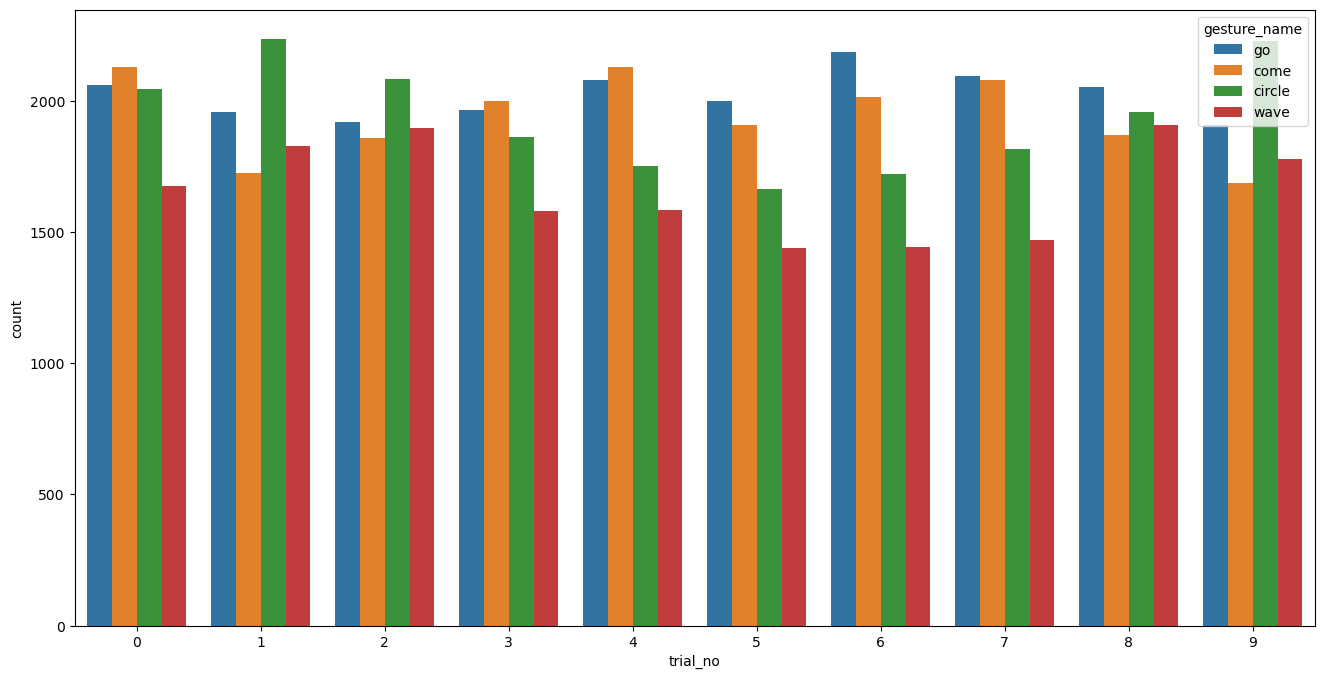

In [232]:
gesture_count_per_trial = pd.DataFrame(columns=['count', 'trial_no', 'gesture_name'])
for gesture_name, trials in gesture_trial_map.items():
    for i, trial in enumerate(trials):
        count = len(trial.x)
        gesture_count_per_trial.loc[len(gesture_count_per_trial.index)] = [count, i, gesture_name]

plt.figure(figsize=(16,8))
sns.barplot(x='trial_no', y='count', hue='gesture_name', data=gesture_count_per_trial)
#plt.savefig('Imbalance-data.png', dpi=300, bbox_inches='tight')
plt.show()

In [233]:
for gesture_name, trials in gesture_trial_map.items():
    for trial in trials:
        # Calculate the offset to adjust the length of the signal
        t = (len(trial.x) - n_x) / 2
        print(n_x)
        
        # Convert the offset to an integer value
        s = int(t)
        
        # Determine the end offset based on whether the start offset is zero or not
        e = int(t) if s != 0 else -n_x
        
        # Trim the signal by applying the start and end offsets
        trial.x = trial.x[s:-e]
        trial.y = trial.y[s:-e]
        trial.z = trial.z[s:-e]
        trial.mag = trial.mag[s:-e]
        trial.time = trial.time[s:-e]
        
        # Trim the signal further to match the desired length (n_x)
        trial.x = trial.x[:n_x]
        trial.y = trial.y[:n_x]
        trial.z = trial.z[:n_x]
        trial.mag = trial.mag[:n_x]
        trial.time = trial.time[:n_x]


1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438
1438


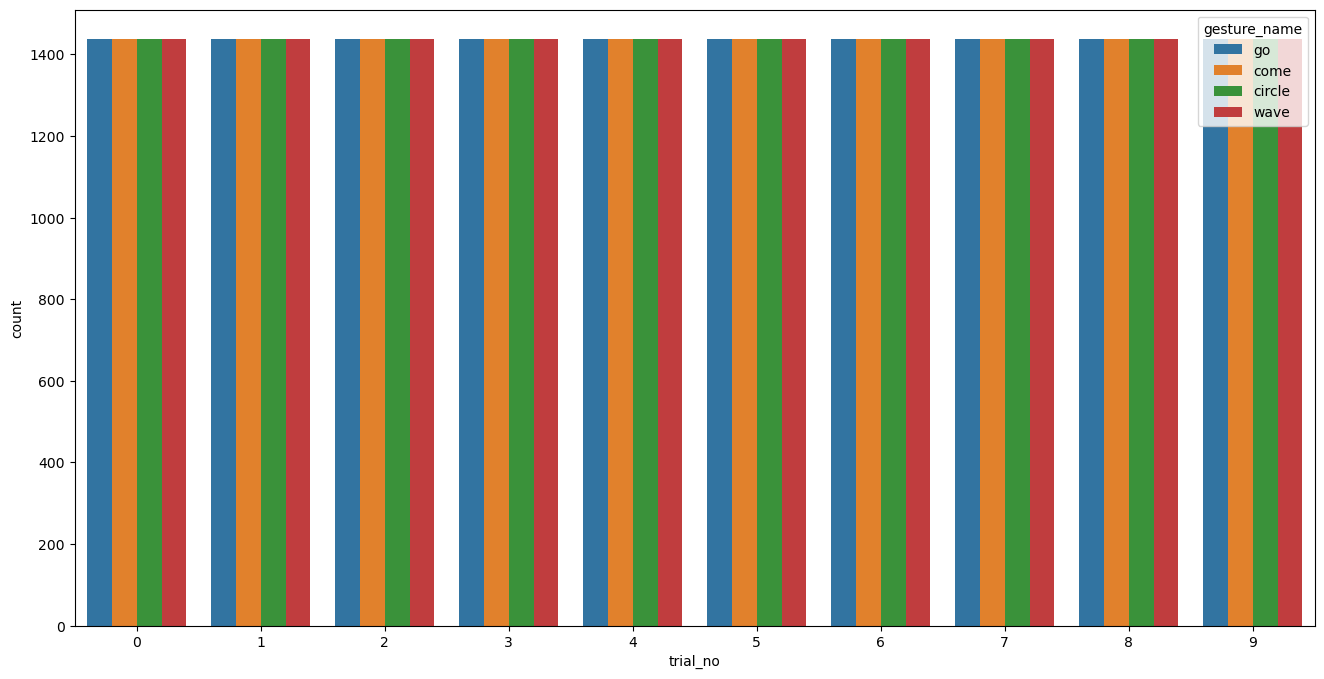

In [234]:
# Create an empty DataFrame to store gesture counts per trial
gesture_count_per_trial = pd.DataFrame(columns=['count', 'trial_no', 'gesture_name'])

# Iterate over each gesture and its corresponding trials
for gesture_name, trials in gesture_trial_map.items():
    # Enumerate through the trials to get the trial number and the trial object
    for i, trial in enumerate(trials):
        # Calculate the count of data points in the trial
        count = len(trial.x)
        
        # Add a new row to the DataFrame with the count, trial number, and gesture name
        gesture_count_per_trial.loc[len(gesture_count_per_trial.index)] = [count, i, gesture_name]

# Create a bar plot to visualize the gesture counts per trial
plt.figure(figsize=(16, 8))
sns.barplot(x='trial_no', y='count', hue='gesture_name', data=gesture_count_per_trial)
#plt.savefig('balance-data.png', dpi=300, bbox_inches='tight')
plt.show()


1438


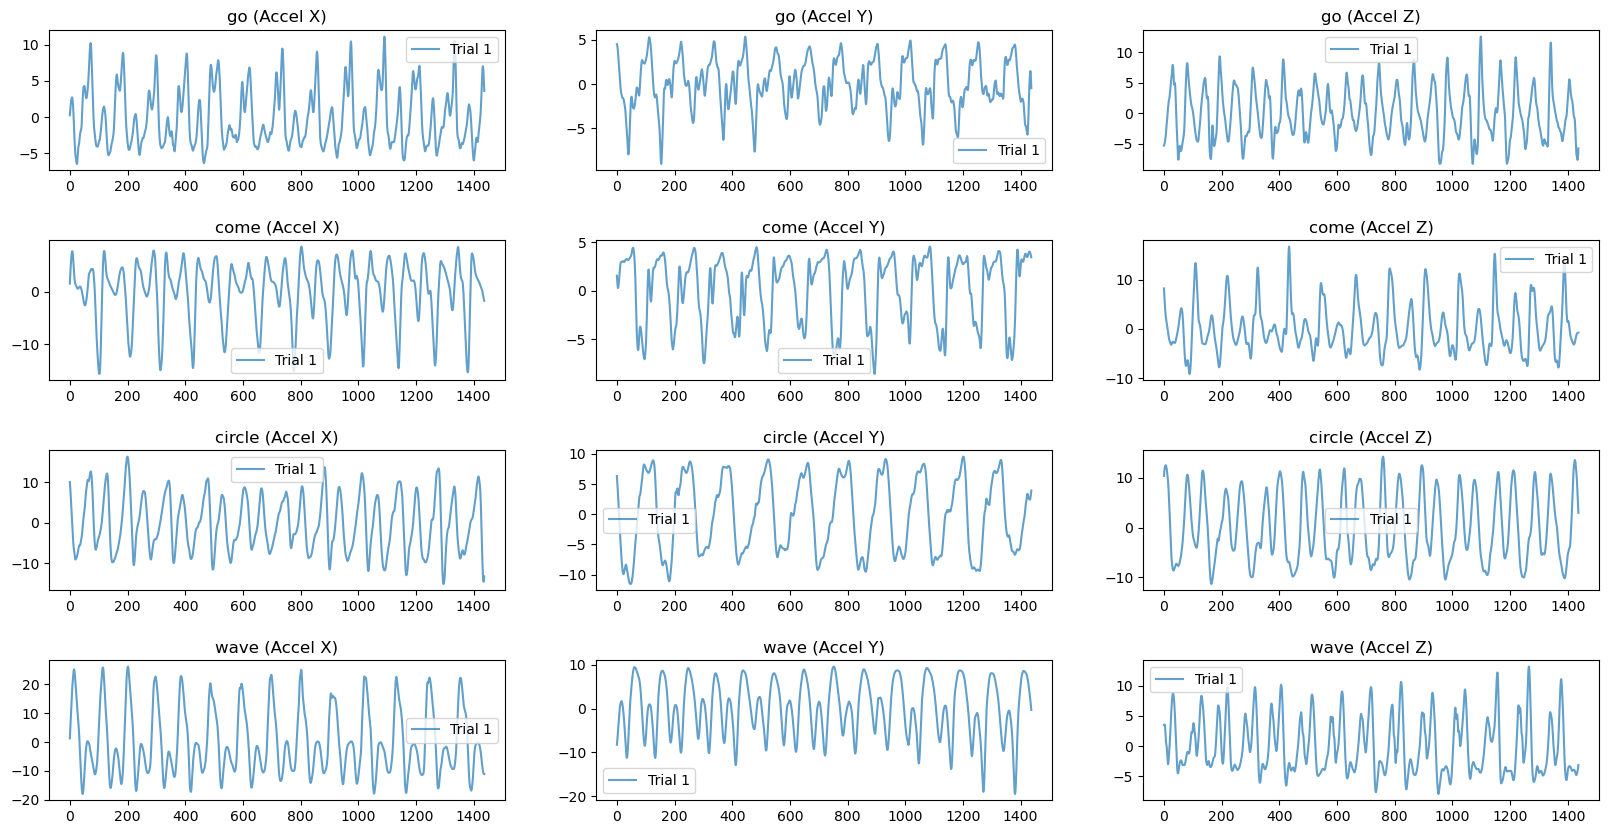

In [235]:
# Create a figure with subplots
fig, axes = plt.subplots(4, 3, figsize=(20,10))
fig.subplots_adjust(hspace=0.5)

# Initialize variables
index = 0
n_x = 10000

# Iterate over each gesture and its corresponding trials
for gesture_name, trials in gesture_trial_map.items():
    trial_num = 1
    # Iterate through the trials to plot the data
    for trial in trials:
        # Plot the x, y, and z data of the trial on the respective subplots
        axes[index][0].plot(trial.x, alpha=0.7, label="Trial {}".format(trial_num))
        axes[index][1].plot(trial.y, alpha=0.7, label="Trial {}".format(trial_num))
        axes[index][2].plot(trial.z, alpha=0.7, label="Trial {}".format(trial_num))
        
        trial_num = trial_num + 1
        # Update the value of n_x if the current trial has more data points
        n_x = n_x if n_x < len(trial.x) else len(trial.x)
        
        # Exit the inner loop after plotting the first trial for each gesture
        break

    # Set the title and legend for each subplot
    axes[index][0].set_title(gesture_name + " (Accel X)")
    axes[index][0].legend()
    
    axes[index][1].set_title(gesture_name + " (Accel Y)")
    axes[index][1].legend()
    
    axes[index][2].set_title(gesture_name + " (Accel Z)")
    axes[index][2].legend()
    
    index = index + 1

# Print the value of n_x
print(n_x)

# Save the figure as an image (optional)
#plt.savefig('balance-data-comparison.png', dpi=300, bbox_inches='tight')


calculating avg acceleration of same gestures

In [236]:
avg_acceleration_each_gesture = []
for gesture_name, trials in gesture_trial_map.items():
    ks=np.sum([x.mag for x in trials], axis=0)
    for i,k in enumerate(ks):
        if i==0:
            continue
        ks[i] = (ks[i] + ks[i-1])
    avg_acceleration_each_gesture.append(ks)
avg_acceleration_data = pd.DataFrame({'go':avg_acceleration_each_gesture[0], 'come':avg_acceleration_each_gesture[1],
                                       'circle':avg_acceleration_each_gesture[2], 'wave':avg_acceleration_each_gesture[3]})

In [237]:
avg_acceleration_data['x_axis'] = avg_acceleration_data.index
avg_acceleration_data = avg_acceleration_data.melt('x_axis', var_name='gesture', value_name='avg_acceleration')

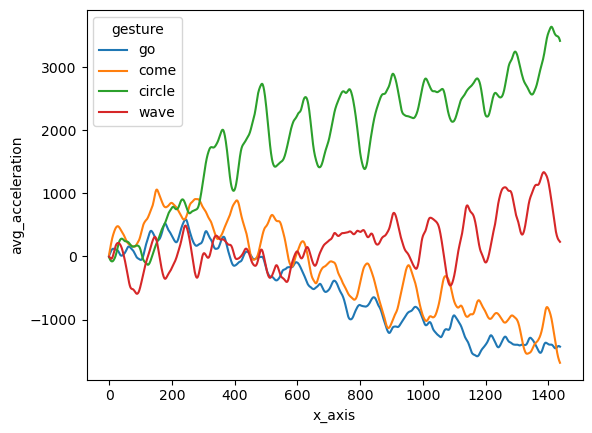

In [238]:
sns.lineplot(x='x_axis', y='avg_acceleration', hue='gesture', data=avg_acceleration_data)
plt.savefig('average_acc.png', dpi=300, bbox_inches='tight')

<AxesSubplot:xlabel='gesture', ylabel='avg_acceleration'>

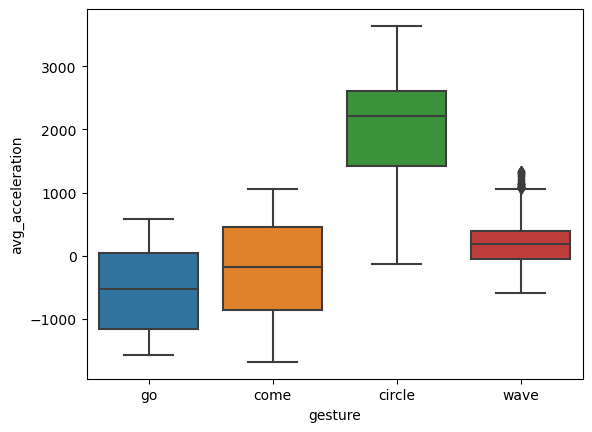

In [ ]:
sns.boxplot(x='gesture', y='avg_acceleration', data=avg_acceleration_data)

### Reference 

In [ ]:
data = list()
def cal_features(x, y, z, mag):
    temp_data = list()
    mean_x = x.mean()
    temp_data.append(mean_x)
    mean_y = y.mean()
    temp_data.append(mean_y)
    mean_z = z.mean()
    temp_data.append(mean_z)
    rmav_x_y = mean_x/mean_y
    temp_data.append(rmav_x_y)
    rmav_y_z = mean_y/mean_z
    temp_data.append(rmav_y_z)
    rmav_z_x = mean_z/mean_x
    temp_data.append(rmav_z_x)
    abs_mav_x_y = abs(mean_x - mean_y)
    temp_data.append(abs_mav_x_y)
    abs_mav_y_z = abs(mean_y - mean_z)
    temp_data.append(abs_mav_y_z)
    abs_mav_z_x = abs(mean_z - mean_x)
    temp_data.append(abs_mav_z_x)
    al_x = max(x[:np.argmax(x)])
    temp_data.append(al_x)
    al_y = max(x[:np.argmax(y)])
    temp_data.append(al_y)
    al_z = max(x[:np.argmax(z)])
    temp_data.append(al_z)
    ar_x = max(x[np.argmax(x) + 1:])
    temp_data.append(ar_x)
    ar_y = max(x[np.argmax(y) + 1:])
    temp_data.append(ar_y)
    ar_z = max(x[np.argmax(z) + 1:])
    temp_data.append(ar_z)
    aj_x = (ar_x - al_x)/abs(len(x[:np.argmax(x)]) + np.argmax(x[np.argmax(x) + 1:])) - np.argmax(x[:np.argmax(x)])
    temp_data.append(aj_x)
    aj_y = (ar_y - al_y)/abs(len(x[:np.argmax(y)]) + np.argmax(y[np.argmax(y) + 1:]) - np.argmax(y[:np.argmax(y)]))
    temp_data.append(aj_y)
    aj_z = (ar_z - al_z)/abs(len(x[:np.argmax(z)]) + np.argmax(z[np.argmax(z) + 1:]) - np.argmax(z[:np.argmax(z)]))
    temp_data.append(aj_z)
    raj_x_y = aj_x/aj_y
    temp_data.append(raj_x_y)
    raj_y_z = aj_y/aj_z
    temp_data.append(raj_y_z)
    raj_z_x = aj_z/aj_x
    temp_data.append(raj_z_x)
    abs_ar_x_y = ar_x - ar_y
    temp_data.append(abs_ar_x_y)
    abs_ar_y_z = ar_y - ar_z
    temp_data.append(abs_ar_y_z)
    abs_ar_z_x = ar_z - ar_x
    temp_data.append(abs_ar_z_x)
    abs_al_x_y = al_x - al_y
    temp_data.append(abs_al_x_y)
    abs_al_y_z = al_y - al_z
    temp_data.append(abs_al_y_z)
    abs_al_z_x = al_z - al_x
    temp_data.append(abs_al_z_x)
    corr_x_y = np.corrcoef(x, y)[0,1] #x.corr(y)#np.cov(x,y)/(np.std(x)*np.std(y))
    temp_data.append(corr_x_y)
    corr_y_z = np.corrcoef(y, z)[0,1]#y.corr(z)#np.cov(y,z)/(np.std(y)*np.std(z))
    temp_data.append(corr_y_z)
    corr_z_x = np.corrcoef(z, x)[0,1]#z.corr(x)#np.cov(z,x)/(np.std(z)*np.std(x))
    temp_data.append(corr_z_x)
    return temp_data

In [ ]:
for gesture_name, trials in gesture_trial_map.items():
    for trial in trials:
        frame_size = 200
        hop_size = 100
        for i in range(0, len(trial.x) - 200, hop_size):
            x = trial.x[i: i + frame_size]
            y = trial.y[i: i + frame_size]
            z = trial.z[i: i + frame_size]
            mag = trial.mag[i: i + frame_size]
            if np.argmax(x) in [0, 199]:
                continue
            if np.argmax(y) in [0, 199]:
                continue
            if np.argmax(z) in [0, 199]:
                continue
            temp_data = cal_features(x,y,z, mag)
            temp_data.append(gesture_name)
            data.append(temp_data)

In [ ]:
columns = ['mean_x', 'mean_y', 'mean_z', 'rmav_x_y', 'rmav_y_z', 'rmav_z_x','abs_mav_x_y', 'abs_mav_y_z', 'abs_mav_z_x', 'al_x', 'al_y', 'al_z', 'ar_x', 'ar_y', 'ar_z', 'aj_x', 'aj_y', 'aj_z', 'raj_x_y', 'raj_y_z', 'raj_z_x', 'abs_ar_x_y', 'abs_ar_y_z', 'abs_ar_z_x', 'abs_al_x_y', 'abs_al_y_z', 'abs_al_z_x', 'corr_x_y', 'corr_y_z', 'corr_z_x', 'label']

In [ ]:
df = pd.DataFrame(data, columns=columns)
df

mean_x    mean_y    mean_z   rmav_x_y  rmav_y_z  rmav_z_x  abs_mav_x_y  \
0    0.585976 -0.758440  0.098830  -0.772608 -7.674204  0.168658     1.344416   
1   -0.122006  0.059821 -0.524922  -2.039517 -0.113962  4.302416     0.181827   
2   -0.710700  0.324075 -0.276212  -2.193009 -1.173283  0.388649     1.034775   
3   -0.358894  0.019463  0.309162 -18.440022  0.062953 -0.861430     0.378357   
4   -0.157124  0.241227  0.436941  -0.651355  0.552081 -2.780863     0.398351   
..        ...       ...       ...        ...       ...       ...          ...   
455 -0.120930  0.707202 -1.180548  -0.170997 -0.599046  9.762263     0.828132   
456 -2.350670  0.146748 -0.235492 -16.018387 -0.623156  0.100181     2.497419   
457 -1.808282  0.553059 -0.152786  -3.269602 -3.619821  0.084492     2.361341   
458  0.517261  0.538953 -0.597372   0.959752 -0.902208 -1.154874     0.021692   
459  0.770099 -0.416063 -0.089908  -1.850921  4.627668 -0.116748     1.186162   

     abs_mav_y_z  abs_mav_z_x       al_x  ...  abs_ar_x_y  abs_ar_y_z  \
0       0.857269     0.487147  10.035812  ...    1.177429    8.693480   
1       0.584743     0.402916   8.640083  ...   -0.047551    0.363956   
2       0.600288     0.434487   8.490346  ...    2.185716    0.000000   
3       0.289700     0.668057   8.524931  ...    1.507560    0.000000   
4       0.195714     0.594065   8.479430  ...    0.874312    0.000000   
..           ...          ...        ...  ...         ...         ...   
455     1.887750     1.059618  22.000793  ...   -0.199729    0.584124   
456     0.382240     2.115178  21.466225  ...   -0.054452    9.065849   
457     0.705845     1.655496  22.002663  ...   22.819846  -23.403952   
458     1.136325     1.114633  22.002663  ...   22.893375   -1.843142   
459     0.326155     0.860007  22.627066  ...   -0.258323    0.000000   

     abs_ar_z_x  abs_al_x_y  abs_al_y_z  abs_al_z_x  corr_x_y  corr_y_z  \
0     -9.870909   -0.170321    0.000000    0.170321  0.036608 -0.190342   
1     -0.316406    8.937243   -9.151463    0.214219  0.004007 -0.251988   
2     -2.185716   -0.034585    0.000000    0.034585 -0.107390 -0.165981   
3     -1.507560   -0.239412    0.000000    0.239412 -0.008845 -0.249489   
4     -0.874312   -0.284913    0.000000    0.284913 -0.021658 -0.187699   
..          ...         ...         ...         ...       ...       ...   
455   -0.384394   21.695449  -21.828509    0.133060 -0.143456 -0.782187   
456   -9.011397   16.131443  -16.214948    0.083504 -0.114128 -0.857697   
457    0.584107   -0.629659    8.050654   -7.420995 -0.124365 -0.902984   
458  -21.050233   -0.629659    0.000000    0.629659 -0.110339 -0.869536   
459    0.258323    0.262110    0.000000   -0.262110 -0.045920 -0.864319   

     corr_z_x  label  
0   -0.528462     go  
1   -0.564577     go  
2   -0.552752     go  
3   -0.436818     go  
4   -0.369126     go  
..        ...    ...  
455 -0.143006   wave  
456 -0.046635   wave  
457  0.052326   wave  
458  0.029474   wave  
459  0.083571   wave  

[460 rows x 31 columns]

In [ ]:
corr = df.corr()

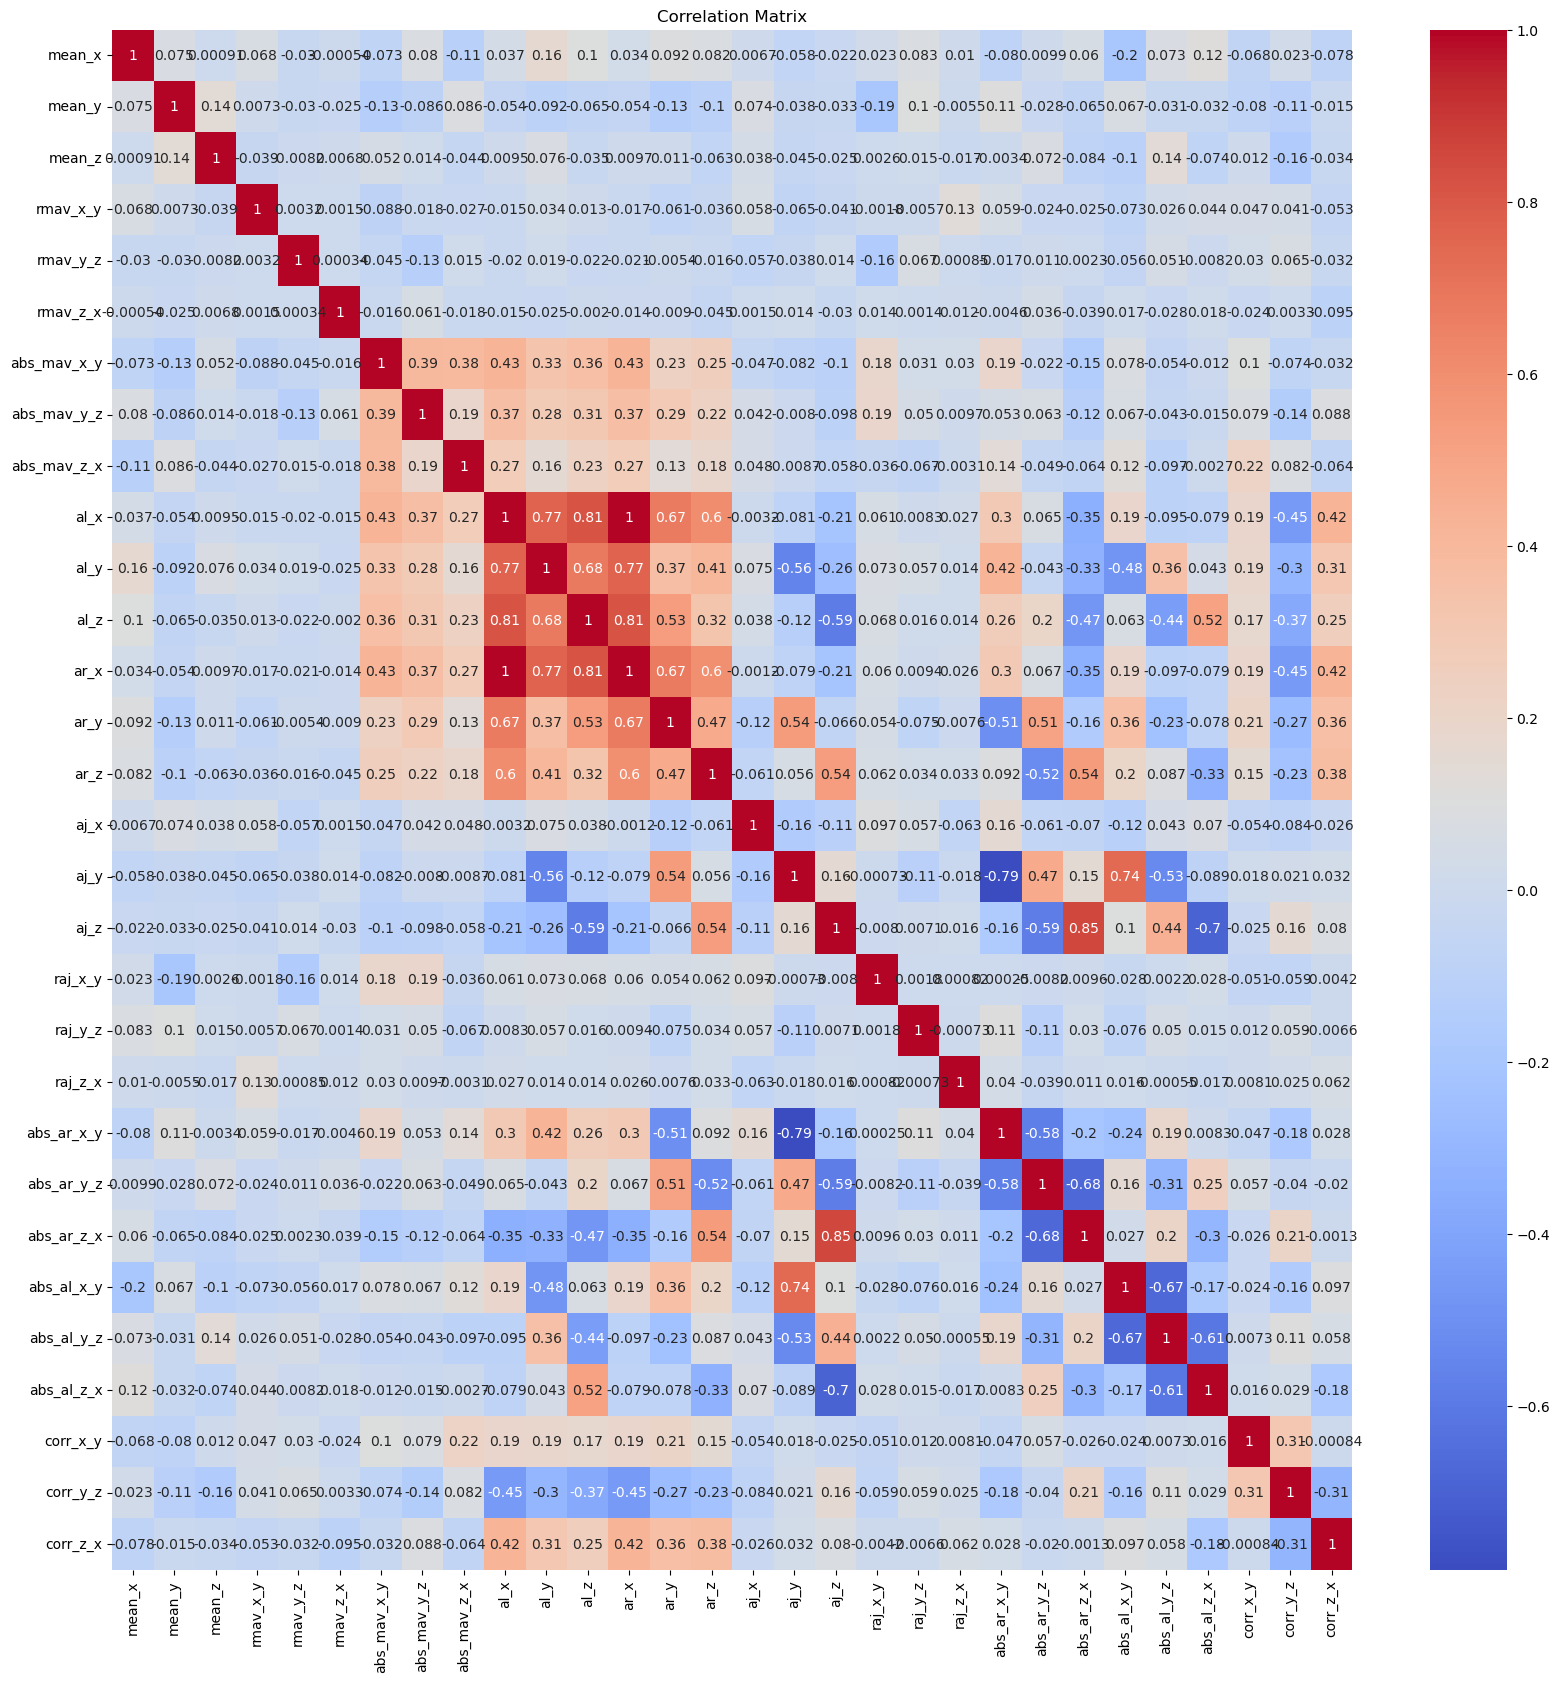

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
df = df.drop(['mean_x', 'mean_y', 'mean_z', 'rmav_x_y', 'rmav_y_z', 'rmav_z_x', 'raj_x_y', 'raj_y_z', 'raj_z_x'], axis=1)

In [ ]:
df

abs_mav_x_y  abs_mav_y_z  abs_mav_z_x       al_x       al_y       al_z  \
0       1.344416     0.857269     0.487147  10.035812  10.206133  10.206133   
1       0.181827     0.584743     0.402916   8.640083  -0.297160   8.854303   
2       1.034775     0.600288     0.434487   8.490346   8.524931   8.524931   
3       0.378357     0.289700     0.668057   8.524931   8.764343   8.764343   
4       0.398351     0.195714     0.594065   8.479430   8.764343   8.764343   
..           ...          ...          ...        ...        ...        ...   
455     0.828132     1.887750     1.059618  22.000793   0.305344  22.133853   
456     2.497419     0.382240     2.115178  21.466225   5.334782  21.549730   
457     2.361341     0.705845     1.655496  22.002663  22.632322  14.581667   
458     0.021692     1.136325     1.114633  22.002663  22.632322  22.632322   
459     1.186162     0.326155     0.860007  22.627066  22.364956  22.364956   

          ar_x       ar_y       ar_z        aj_x  ...  abs_ar_x_y  abs_ar_y_z  \
0    10.031731   8.854303   0.160822  -71.000057  ...    1.177429    8.693480   
1     8.806752   8.854303   8.490346  -82.998016  ...   -0.047551    0.363956   
2     8.215275   6.029559   6.029559  -99.002751  ...    2.185716    0.000000   
3     8.717674   7.210113   7.210113    0.001836  ...    1.507560    0.000000   
4     8.717674   7.843362   7.843362   -3.952351  ...    0.874312    0.000000   
..         ...        ...        ...         ...  ...         ...         ...   
455  21.934124  22.133853  21.549730  -81.000813  ...   -0.199729    0.584124   
456  21.495277  21.549730  12.483880  -89.999681  ...   -0.054452    9.065849   
457  22.048215  -0.771631  22.632322 -102.999562  ...   22.819846  -23.403952   
458  22.364956  -0.528419   1.314723   -2.996930  ...   22.893375   -1.843142   
459  22.628424  22.886748  22.886748 -131.999990  ...   -0.258323    0.000000   

     abs_ar_z_x  abs_al_x_y  abs_al_y_z  abs_al_z_x  corr_x_y  corr_y_z  \
0     -9.870909   -0.170321    0.000000    0.170321  0.036608 -0.190342   
1     -0.316406    8.937243   -9.151463    0.214219  0.004007 -0.251988   
2     -2.185716   -0.034585    0.000000    0.034585 -0.107390 -0.165981   
3     -1.507560   -0.239412    0.000000    0.239412 -0.008845 -0.249489   
4     -0.874312   -0.284913    0.000000    0.284913 -0.021658 -0.187699   
..          ...         ...         ...         ...       ...       ...   
455   -0.384394   21.695449  -21.828509    0.133060 -0.143456 -0.782187   
456   -9.011397   16.131443  -16.214948    0.083504 -0.114128 -0.857697   
457    0.584107   -0.629659    8.050654   -7.420995 -0.124365 -0.902984   
458  -21.050233   -0.629659    0.000000    0.629659 -0.110339 -0.869536   
459    0.258323    0.262110    0.000000   -0.262110 -0.045920 -0.864319   

     corr_z_x  label  
0   -0.528462     go  
1   -0.564577     go  
2   -0.552752     go  
3   -0.436818     go  
4   -0.369126     go  
..        ...    ...  
455 -0.143006   wave  
456 -0.046635   wave  
457  0.052326   wave  
458  0.029474   wave  
459  0.083571   wave  

[460 rows x 22 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
def prepare_targets(y_train, y_test):
 le = preprocessing.LabelEncoder()
 le.fit(y_train)
 y_train_enc = le.transform(y_train)
 y_test_enc = le.transform(y_test)
 return y_train_enc, y_test_enc

In [ ]:
X = df.iloc[:, :-1]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
y_train, y_test = prepare_targets(y_train, y_test)
len(y_train)

230

#  Classification
 1. Linear SVC with GridSearch
 2. Decision tree with GridSearch
 3. Random Forest Classifier with GridSearch
 4. Gradient Boosting Decision Trees With GridSearch

### Generic function to run any model specified

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib
from sklearn import metrics

def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Reds):
    
    # Create a dictionary to store results at various phases
    results = dict()
    
    # Print training phase
    print('Training the model..')
    
    # Train the model
    model.fit(X_train, y_train)
    print('Done \n \n')
    
    # Predict the test data
    print('Predicting test data')
    y_pred = model.predict(X_test)
    print('Done \n \n')
    
    # Store the predicted labels in results
    results['predicted'] = y_pred
    
    # Calculate the overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # Store accuracy in results
    results['accuracy'] = accuracy
    
    # Print accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    # Compute the confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        # Print confusion matrix
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # Plot confusion matrix
    fig, ax = plot_confusion_matrix(conf_mat=cm, class_names=class_labels)
    
    # Get the classification report
    print('-------------------------')
    print('| Classification Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # Store classification report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # Add the trained model to the results
    results['model'] = model
    
    return results


### Method to print the gridsearch Attributes

In [ ]:
def print_best_grid_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))

    
    

### 1.  Linear SVC with GridSearch

training the model..


/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.p

Done 
 

Predicting test data
Done 
 

---------------------
|      Accuracy      |
---------------------

    0.8565217391304348


--------------------
| Confusion Matrix |
--------------------

 [[32 16  0  0]
 [ 6 45  5  1]
 [ 1  3 60  0]
 [ 0  1  0 60]]
-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.82      0.67      0.74        48
           1       0.69      0.79      0.74        57
           2       0.92      0.94      0.93        64
           3       0.98      0.98      0.98        61

    accuracy                           0.86       230
   macro avg       0.85      0.84      0.85       230
weighted avg       0.86      0.86      0.86       230



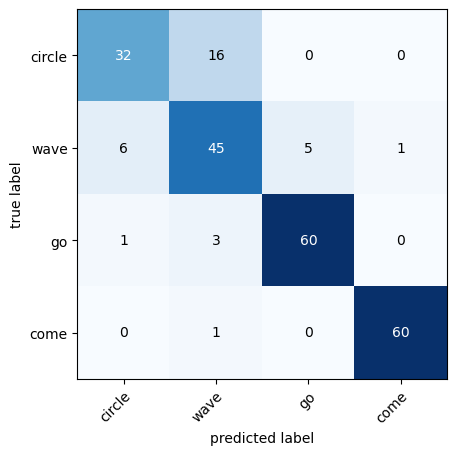

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Define the parameter grid for GridSearchCV
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)

l_svc_grid_search = GridSearchCV(lr_svc, param_grid = parameters, cv=5, scoring='accuracy')
L_svc_results = perform_model(l_svc_grid_search, X_train, y_train, X_test, y_test, class_labels=['circle', 'wave', 'go', 'come'])

In [ ]:
print_best_grid_attributes(L_svc_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	Pipeline(steps=[('scaler', StandardScaler()), ('classifier', LinearSVC(C=10))])

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'classifier__C': 10, 'classifier__loss': 'squared_hinge', 'classifier__max_iter': 1000}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5



### 2.  Decision Trees with GridSearchCV


training the model..
Done 
 

Predicting test data
Done 
 

---------------------
|      Accuracy      |
---------------------

    0.9260869565217391


--------------------
| Confusion Matrix |
--------------------

 [[46  2  0  0]
 [ 5 45  5  2]
 [ 0  2 62  0]
 [ 0  1  0 60]]
-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        48
           1       0.90      0.79      0.84        57
           2       0.93      0.97      0.95        64
           3       0.97      0.98      0.98        61

    accuracy                           0.93       230
   macro avg       0.92      0.93      0.92       230
weighted avg       0.93      0.93      0.92       230



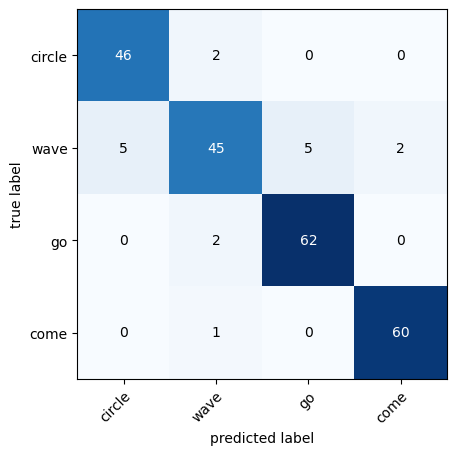

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree classifier
classifier = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],       # Split criterion
    'max_depth': np.arange(3,20,2)         # Maximum depth of the tree
}

# Perform grid search with cross-validation
dt_grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
DT_grid_results = perform_model(dt_grid_search, X_train, y_train, X_test, y_test, class_labels=['circle', 'wave', 'go', 'come'])

In [ ]:
print_best_grid_attributes(DT_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(criterion='entropy', max_depth=17)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'criterion': 'entropy', 'max_depth': 17}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5



### 3. Random Forest Classifier with GridSearch

training the model..
Done 
 

Predicting test data
Done 
 

---------------------
|      Accuracy      |
---------------------

    0.9347826086956522


--------------------
| Confusion Matrix |
--------------------

 [[44  3  1  0]
 [ 4 49  4  0]
 [ 0  3 61  0]
 [ 0  0  0 61]]
-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        48
           1       0.89      0.86      0.88        57
           2       0.92      0.95      0.94        64
           3       1.00      1.00      1.00        61

    accuracy                           0.93       230
   macro avg       0.93      0.93      0.93       230
weighted avg       0.93      0.93      0.93       230



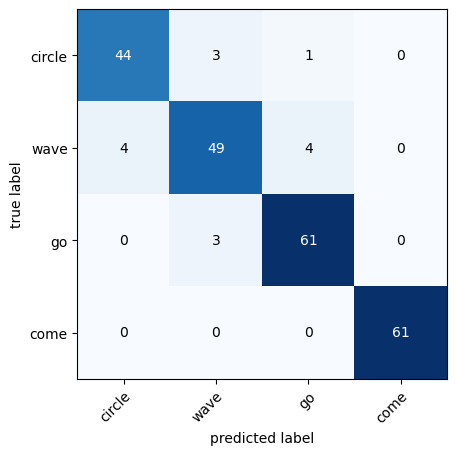

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier
classifier = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': np.arange(10,201,20),                 # Number of decision trees in the forest
    'criterion': ['gini', 'entropy'],                 # Split criterion
    'max_depth': np.arange(3,15,2)                       # Maximum depth of each decision tree
}

# Perform grid search with cross-validation
rf_grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
rf_grid_results = perform_model(rf_grid_search, X_train, y_train, X_test, y_test, class_labels=['circle', 'wave', 'go', 'come'])

In [ ]:
print_best_grid_attributes(rf_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=13, n_estimators=130)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'criterion': 'gini', 'max_depth': 13, 'n_estimators': 130}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5



### 4.  Gradient Boosted Decision Trees With GridSearch

training the model..
Done 
 

Predicting test data
Done 
 

---------------------
|      Accuracy      |
---------------------

    0.9521739130434783


--------------------
| Confusion Matrix |
--------------------

 [[46  2  0  0]
 [ 3 51  3  0]
 [ 1  2 61  0]
 [ 0  0  0 61]]
-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        48
           1       0.93      0.89      0.91        57
           2       0.95      0.95      0.95        64
           3       1.00      1.00      1.00        61

    accuracy                           0.95       230
   macro avg       0.95      0.95      0.95       230
weighted avg       0.95      0.95      0.95       230



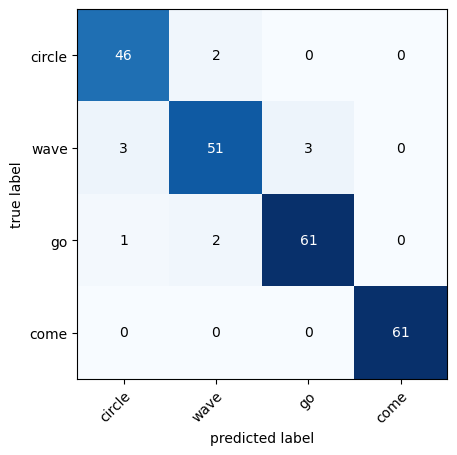

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
   'max_depth': np.arange(3,8,1), 
   'n_estimators':np.arange(130,200,10),
   'learning_rate': [0.1, 0.01, 0.001]        # Learning rate
}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=['circle', 'wave', 'go', 'come'])


In [ ]:
print_best_grid_attributes(gbdt_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(max_depth=4, n_estimators=140)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 140}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5



In [ ]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')

print('Linear SVC          : {:.04}%       {:.04}% '.format(L_svc_results['accuracy'] * 100,\
                                                        100-(L_svc_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(DT_grid_results['accuracy'] * 100,\
                                                        100-(DT_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rf_grid_results['accuracy'] * 100,\
                                                           100-(rf_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(gbdt_grid_results['accuracy'] * 100,\
                                                        100-(gbdt_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Linear SVC          : 85.65%       14.35% 
DecisionTree        : 92.61%      7.391% 
Random Forest       : 93.48%      6.522% 
GradientBoosting DT : 95.22%      4.783% 


# Approach-2 Deepak Kumar Singh 20493345

In [ ]:
gesture_trial_map=load_data()

In [ ]:
for gesture_name, trials in gesture_trial_map.items():
    for trial in trials:
        preprocess_trial(trial)

1438


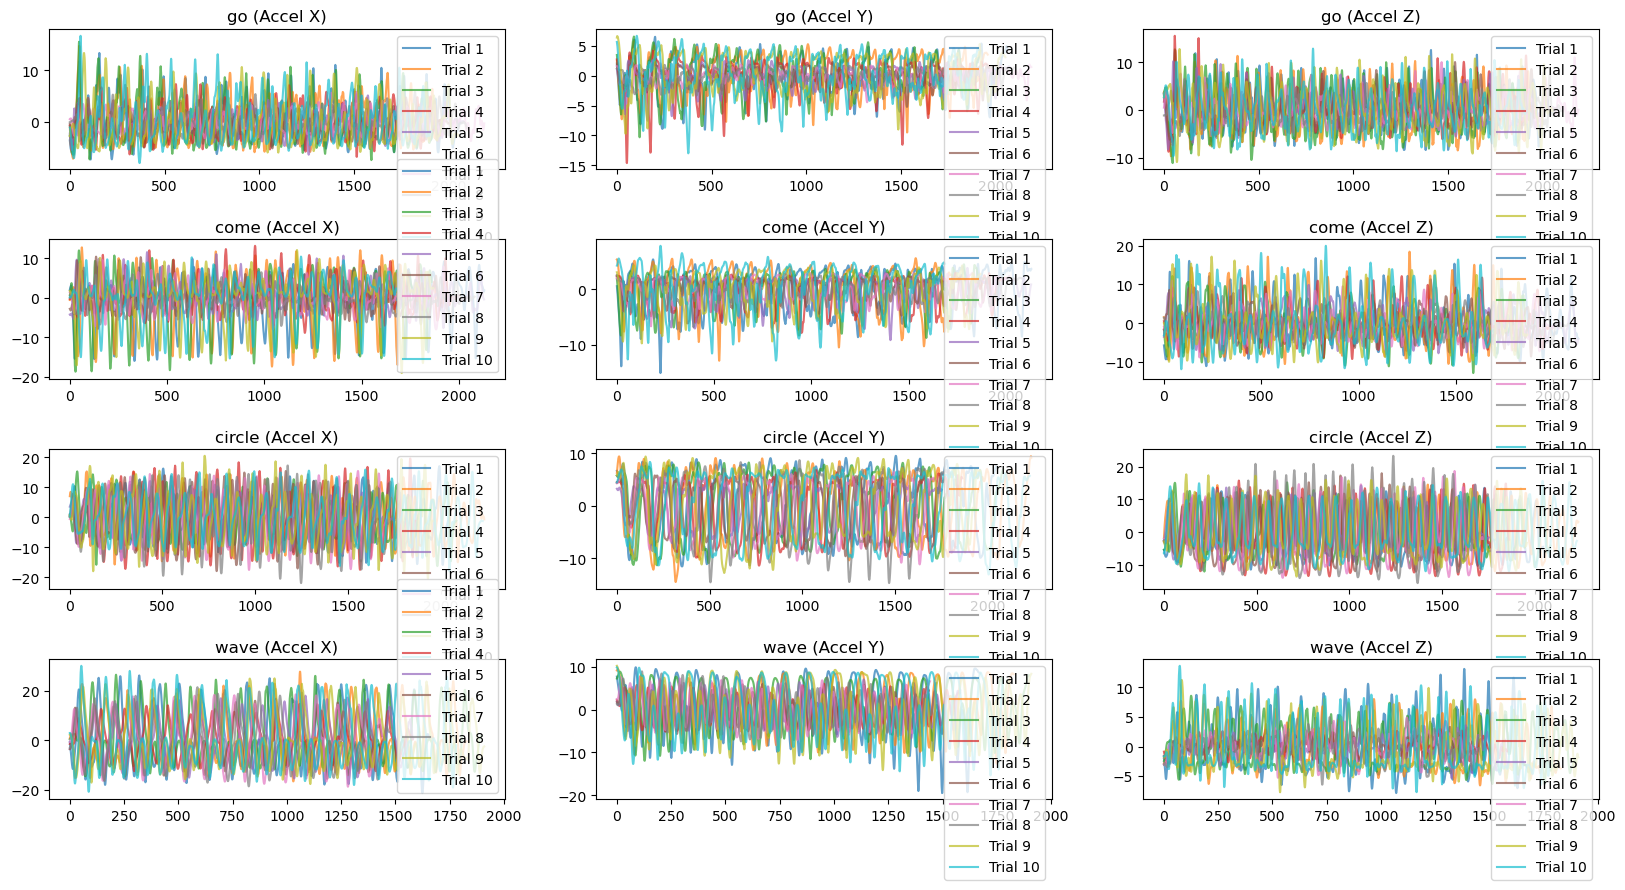

In [ ]:
#plot all the gestuers trail

fig, axes = plt.subplots(4, 3, figsize=(20,10))
fig.subplots_adjust(hspace=0.5)

index = 0
n_x = 10000 
for gesture_name, trials in gesture_trial_map.items():
    trial_num = 1
    for trial in trials:
        axes[index][0].plot(trial.x, alpha=0.7, label="Trial {}".format(trial_num))
        axes[index][1].plot(trial.y, alpha=0.7, label="Trial {}".format(trial_num))
        axes[index][2].plot(trial.z, alpha=0.7, label="Trial {}".format(trial_num))
        trial_num = trial_num + 1
        n_x = n_x if n_x < len(trial.x) else len(trial.x)
    axes[index][0].set_title(gesture_name + " (Accel X)")
    axes[index][0].legend()
    
    axes[index][1].set_title(gesture_name + " (Accel Y)")
    axes[index][1].legend()
    
    axes[index][2].set_title(gesture_name + " (Accel Z)")
    axes[index][2].legend()
    index = index + 1
print(n_x)


In [ ]:
from scipy import signal

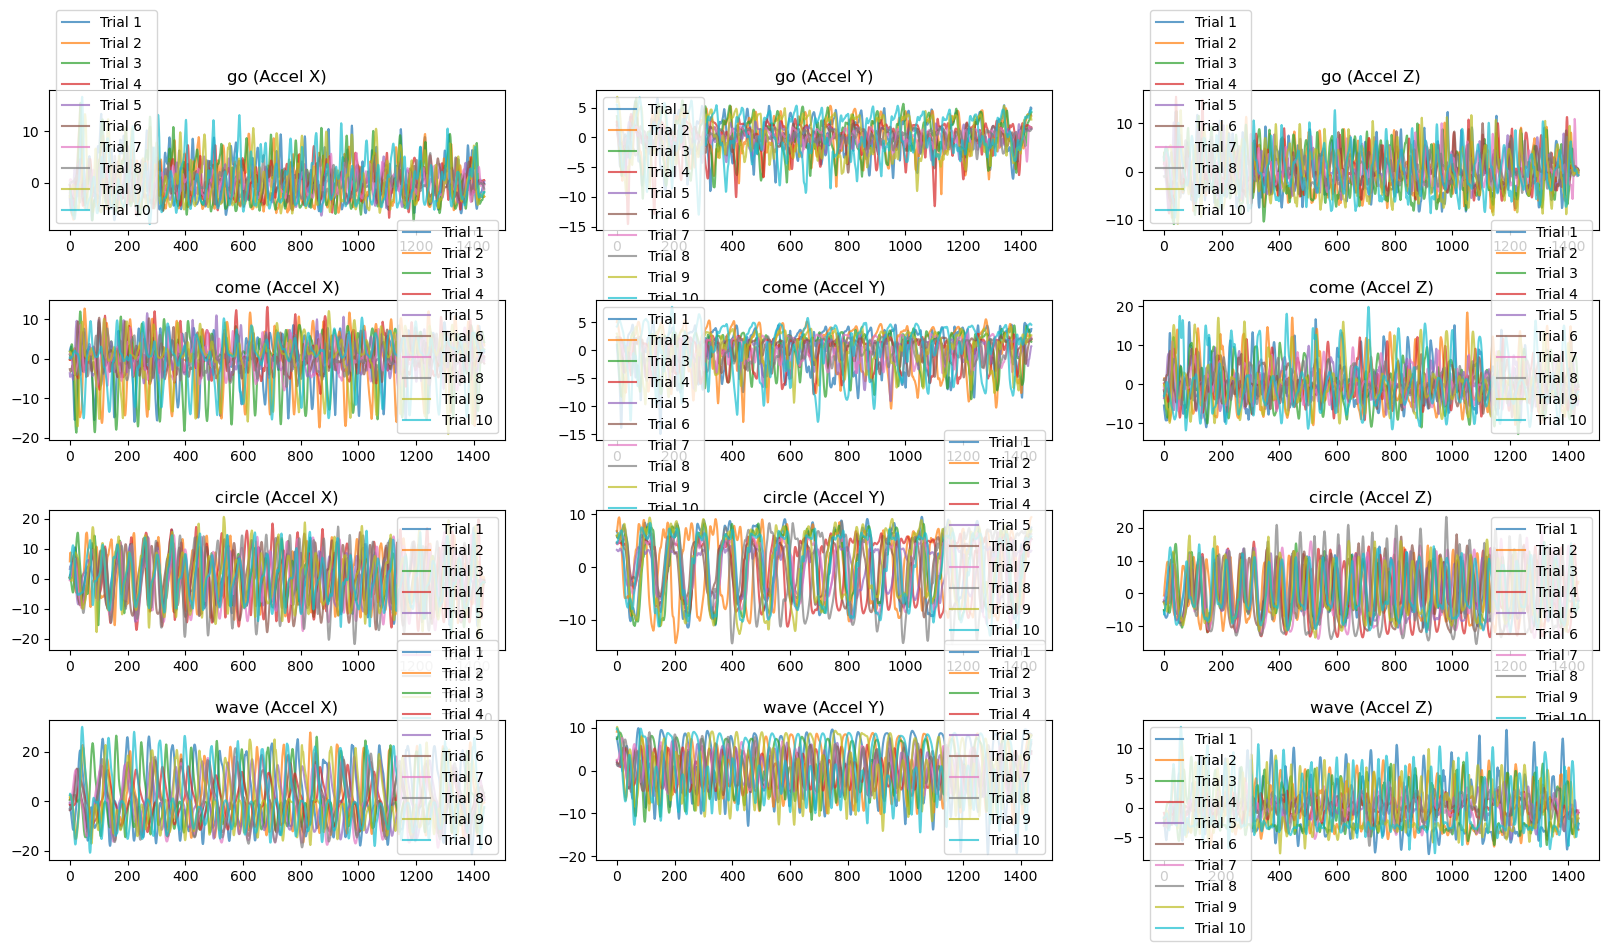

In [ ]:
# Plot all the gesture trials

fig, axes = plt.subplots(4, 3, figsize=(20,10))
fig.subplots_adjust(hspace=0.5)

index = 0

# Iterate over gesture names and trials
for gesture_name, trials in gesture_trial_map.items():
    trial_num = 1
    
    # Iterate over trials for each gesture
    for trial in trials:
        down_sample_freq = n_x
        
        # Downsample the trial data using signal.resample
        trial.x = signal.resample(trial.x, down_sample_freq)
        trial.y = signal.resample(trial.y, down_sample_freq)
        trial.z = signal.resample(trial.z, down_sample_freq)
        trial.mag = signal.resample(trial.mag, down_sample_freq)
        trial.time = signal.resample(trial.time, down_sample_freq)
        
        # Plot the resampled trial data
        axes[index][0].plot(trial.x, alpha=0.7, label="Trial {}".format(trial_num))
        axes[index][1].plot(trial.y, alpha=0.7, label="Trial {}".format(trial_num))
        axes[index][2].plot(trial.z, alpha=0.7, label="Trial {}".format(trial_num))
        trial_num = trial_num + 1
    
    # Set titles and legends for each subplot
    axes[index][0].set_title(gesture_name + " (Accel X)")
    axes[index][0].legend()
    axes[index][1].set_title(gesture_name + " (Accel Y)")
    axes[index][1].legend()
    axes[index][2].set_title(gesture_name + " (Accel Z)")
    axes[index][2].legend()
    
    index = index + 1


In [ ]:
from pywt import wavedec
import pywt

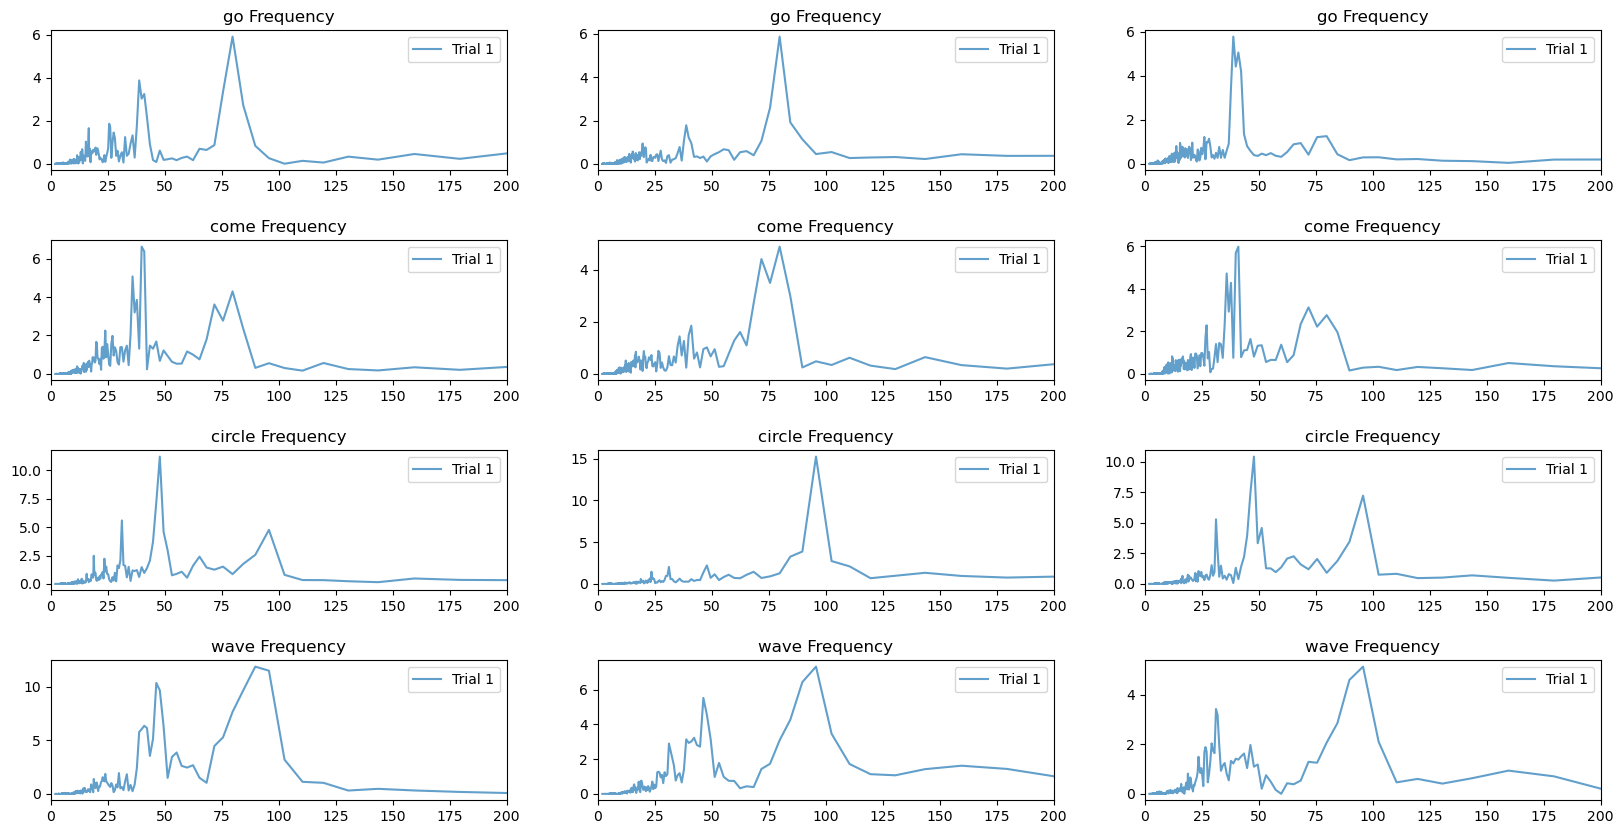

In [ ]:
# Plot the frequency spectra of the gesture trials

fig, axes = plt.subplots(4, 3, figsize=(20,10))
fig.subplots_adjust(hspace=0.5)

index = 0

# Iterate over gesture names and trials
for gesture_name, trials in gesture_trial_map.items():
    trial_num = 1
    
    # Iterate over trials for each gesture
    for trial in trials:
        down_sample_freq = n_x
        
        # Perform FFT on the trial data
        fft_x = np.fft.fft(trial.x)
        frequencies_x = 1.0/(np.linspace(10**-12, 0.5, int(len(fft_x)/2), endpoint=True))
        fft_y = np.fft.fft(trial.y)
        frequencies_y = 1.0/(np.linspace(10**-12, 0.5, int(len(fft_y)/2), endpoint=True))
        fft_z = np.fft.fft(trial.z)
        frequencies_z = 1.0/(np.linspace(10**-12, 0.5, int(len(fft_z)/2), endpoint=True))
        
        # Plot the frequency spectra of the trial data
        axes[index][0].plot(frequencies_x, 2*np.abs(fft_x)[0:int(len(fft_x)/2.0)]/len(frequencies_x), alpha=0.7, label="Trial {}".format(trial_num))
        axes[index][1].plot(frequencies_y, 2*np.abs(fft_y)[0:int(len(fft_y)/2.0)]/len(frequencies_y), alpha=0.7, label="Trial {}".format(trial_num))
        axes[index][2].plot(frequencies_z, 2*np.abs(fft_z)[0:int(len(fft_z)/2.0)]/len(frequencies_z), alpha=0.7, label="Trial {}".format(trial_num))
        
        trial_num = trial_num + 1
        break
    
    # Set titles, legends, and limits for each subplot
    axes[index][0].set_title(gesture_name + " Frequency")
    axes[index][0].legend()
    axes[index][0].set_xlim(0, 200)
    
    axes[index][1].set_title(gesture_name + " Frequency")
    axes[index][1].legend()
    axes[index][1].set_xlim(0, 200)
    
    axes[index][2].set_title(gesture_name + " Frequency")
    axes[index][2].legend()
    axes[index][2].set_xlim(0, 200)
    
    index = index + 1


1438


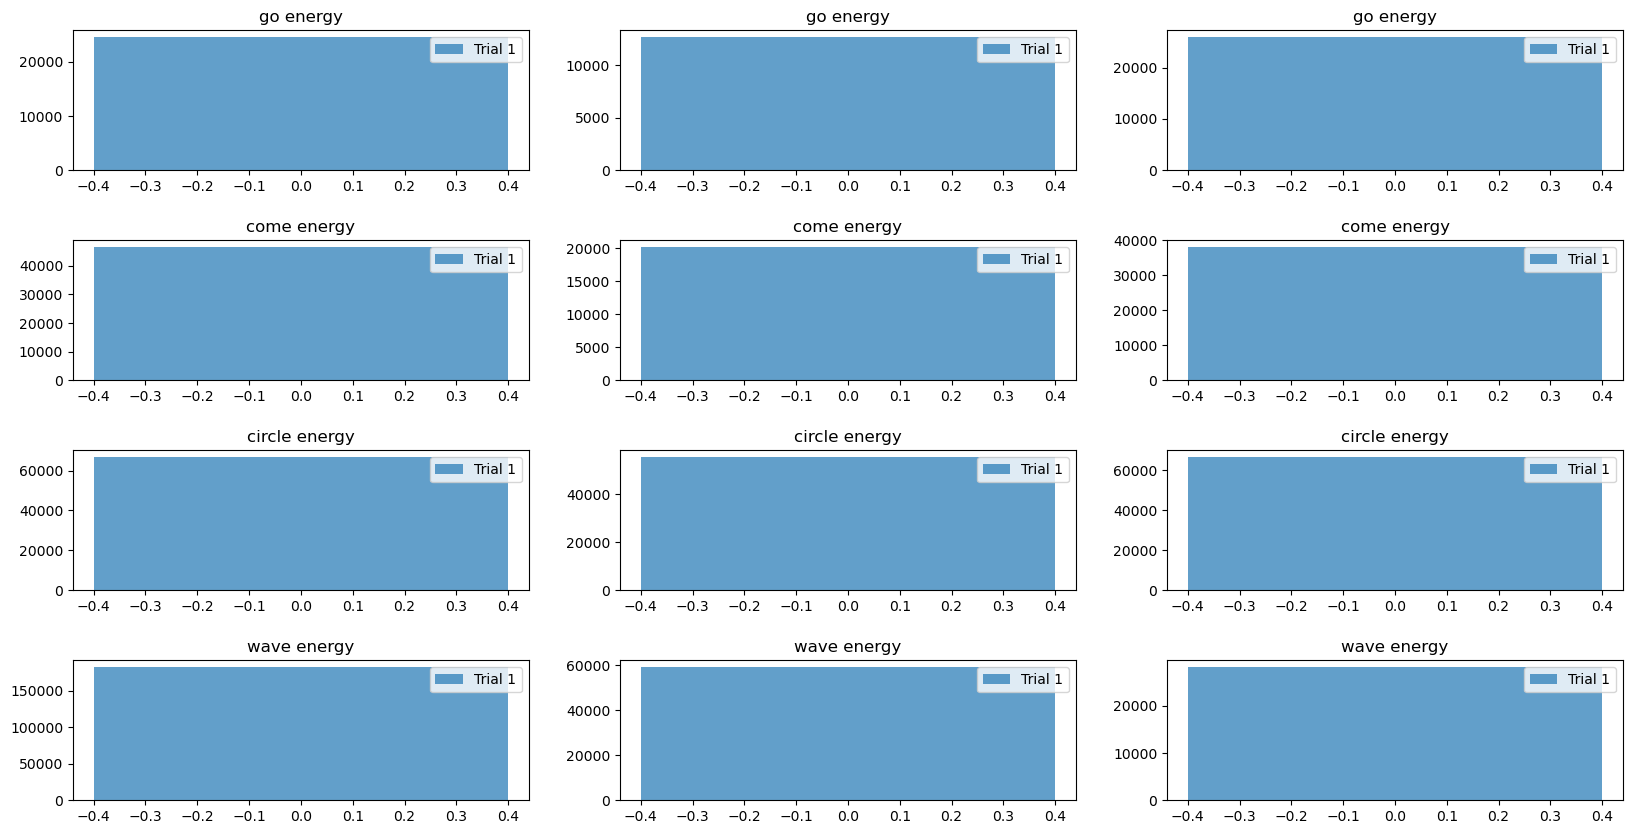

In [ ]:
#plot all the gestuers trail

fig, axes = plt.subplots(4, 3, figsize=(20,10))
fig.subplots_adjust(hspace=0.5)

index = 0
n_x = 10000 
for gesture_name, trials in gesture_trial_map.items():
    trial_num = 1
    for trial in trials:
        energy_x = np.square(trial.x).sum()
        energy_y = np.square(trial.y).sum()
        energy_z = np.square(trial.z).sum()
        axes[index][0].bar( 0, energy_x, alpha=0.7, label="Trial {}".format(trial_num))
        axes[index][1].bar(0,energy_y, alpha=0.7, label="Trial {}".format(trial_num))
        axes[index][2].bar(0,energy_z, alpha=0.7, label="Trial {}".format(trial_num))
        trial_num = trial_num + 1
        n_x = n_x if n_x < len(trial.x) else len(trial.x)
        break
    axes[index][0].set_title(gesture_name + " energy")
    axes[index][0].legend()
    
    axes[index][1].set_title(gesture_name + " energy")
    axes[index][1].legend()
    
    axes[index][2].set_title(gesture_name + " energy")
    axes[index][2].legend()
    index = index + 1
print(n_x)


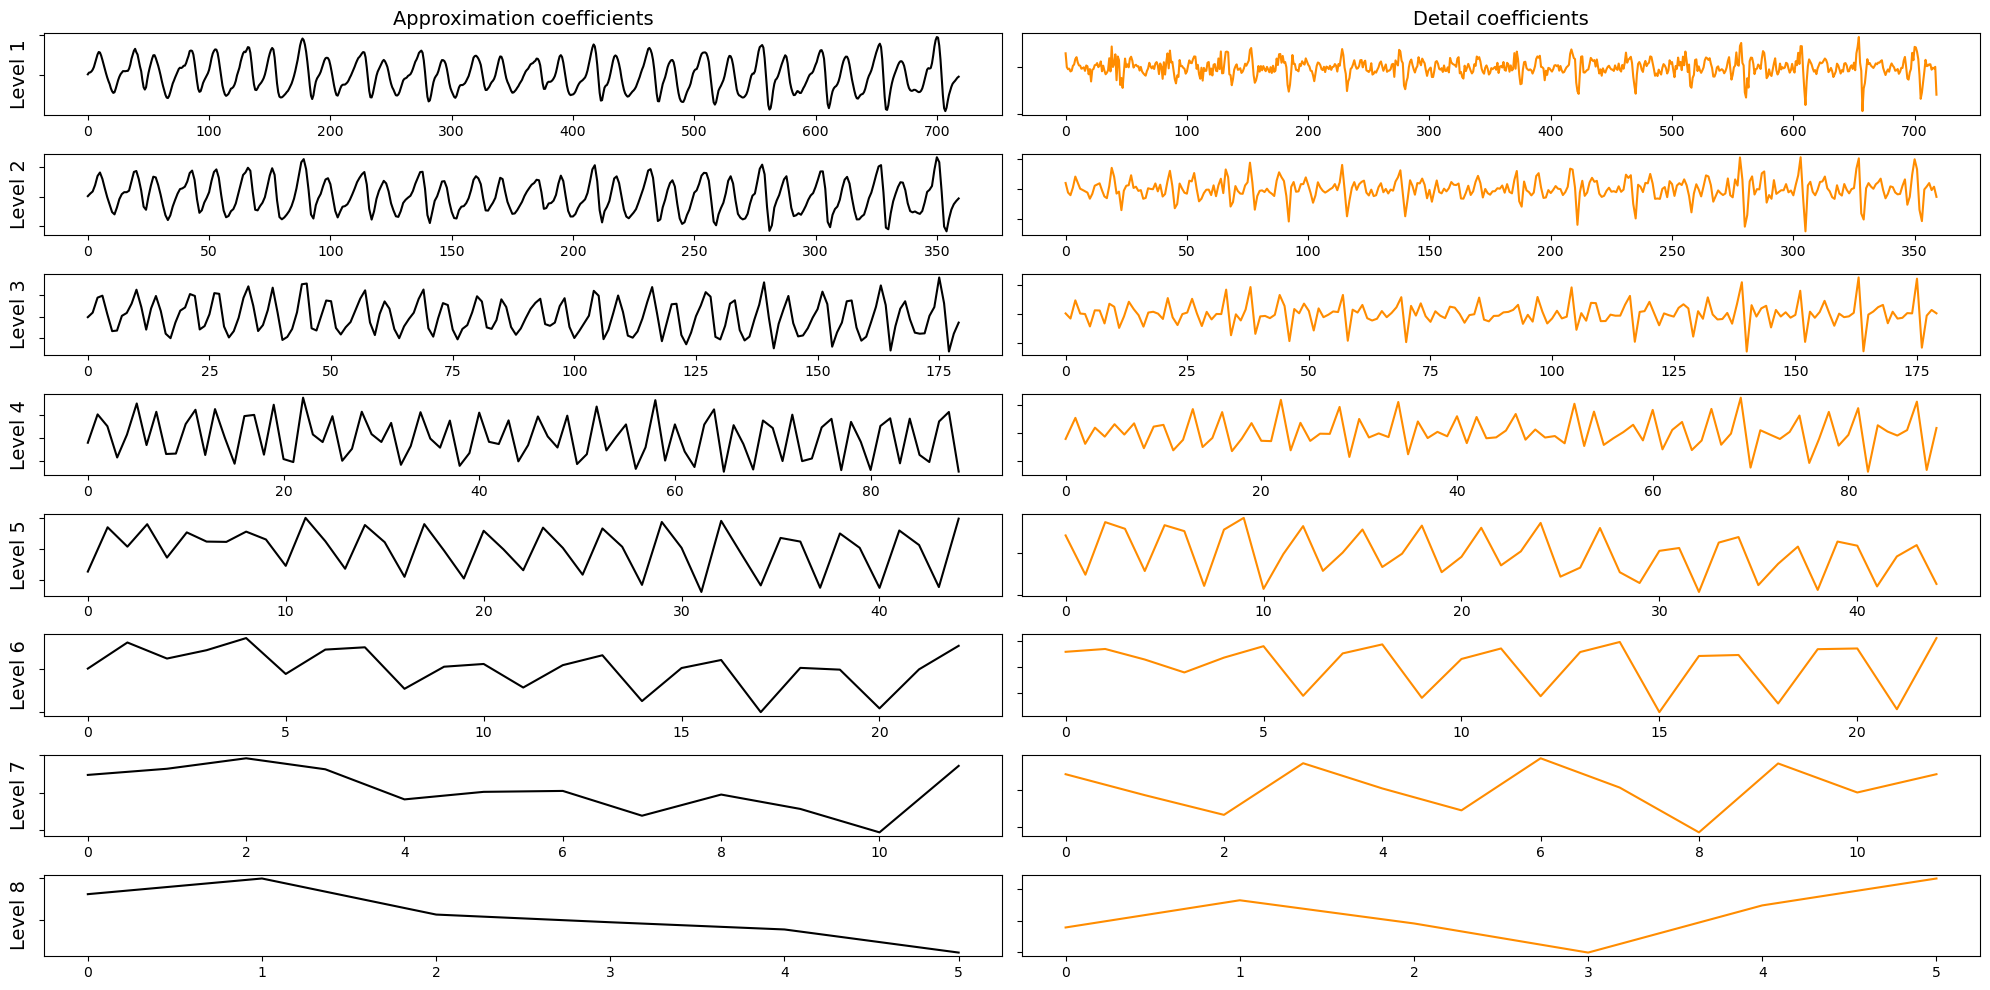

In [ ]:
# Perform Discrete Wavelet Transform (DWT) and plot the wavelet decomposition

# Obtain the signal data from the 'circle' gesture trial
y_signal = gesture_trial_map['circle'][0].x

# Define time and sample rate parameters
time = x.max()
sample_rate = 1 / 900.0

# Calculate the size of the dataset based on the sample rate and time
size = int(sample_rate * time)

# Create a time array using linspace
t = np.linspace(0, time, num=size)

# Set the dataset as the y_signal
dataset = y_signal

# Define the wavelet name
waveletname = 'sym2'

# Define the number of levels for wavelet decomposition
levels = 8

# Create subplots for each level of decomposition
fig, axarr = plt.subplots(nrows=levels, ncols=2, figsize=(20, 10))

# Initialize empty lists to store the coefficient and dataset values
COEFF_D = []
DATASET = []

# Initialize a counter variable k
k = 1

# Perform wavelet decomposition and plot the results
for ii in range(levels):
    # Perform DWT on the dataset using the specified wavelet and mode
    (dataset, coeff_d) = pywt.dwt(dataset, waveletname, mode='per')
    
    # Plot the approximation coefficients on the left subplot
    axarr[ii, 0].plot(dataset, 'black')
    
    # Plot the detail coefficients on the right subplot
    axarr[ii, 1].plot(coeff_d, 'darkorange')
    
    # Set the y-axis label for the left subplot
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    
    # Set the title for the first row of subplots
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    
    axarr[ii, 1].set_yticklabels([])
    
    # Append the coefficient values to the COEFF_D list
    COEFF_D.append(np.repeat(coeff_d, 2**k))
    
    # Append the dataset values to the DATASET list
    DATASET.append(np.repeat(dataset, 2**k))
    
    # Increment the counter variable k
    k = k + 1

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
def feature_extraction(signal_x, signal_y, signal_z):
    features = []
    cA4, cD4, cD3, cD2, cD1  = wavedec(signal_x, 'db1', level=4)
    cD4 = [i for i in cD4 if i!=0.0]
    cD3 = [i for i in cD3 if i!=0.0]
    cD2 = [i for i in cD2 if i!=0.0]
    cA4 = [i for i in cA4 if i!=0.0]
    cD4_energy_x = np.abs(np.sum(np.square(cD4)))
    features.append(cD4_energy_x)
    cD3_energy_x = np.abs(np.sum(np.square(cD3)))
    features.append(cD3_energy_x)
    cD2_energy_x = np.abs(np.sum(np.square(cD2)))
    features.append(cD2_energy_x)
    cA4_energy_x = np.abs(np.sum(np.square(cA4)))
    features.append(cA4_energy_x)

    cD4_entropy_x = np.abs(np.sum(np.square(cD4) * np.log(np.square(cD4))))
    features.append(cD4_entropy_x)
    cD3_entropy_x = np.abs(np.sum(np.square(cD3) * np.log(np.square(cD3))))
    features.append(cD3_entropy_x)
    cD2_entropy_x = np.abs(np.sum(np.square(cD2) * np.log(np.square(cD2))))
    features.append(cD2_entropy_x)
    cA4_entropy_x = np.abs(np.sum(np.square(cA4) * np.log(np.square(cA4))))
    features.append(cA4_entropy_x)

    cA4, cD4, cD3, cD2, cD1  = wavedec(signal_y, 'db1', level=4)
    cD4 = [i for i in cD4 if i!=0.0]
    cD3 = [i for i in cD3 if i!=0.0]
    cD2 = [i for i in cD2 if i!=0.0]
    cA4 = [i for i in cA4 if i!=0.0]
    cD4_energy_y = np.abs(np.sum(np.square(cD4)))
    features.append(cD4_energy_y)
    cD3_energy_y = np.abs(np.sum(np.square(cD3)))
    features.append(cD3_energy_y)
    cD2_energy_y = np.abs(np.sum(np.square(cD2)))
    features.append(cD2_energy_y)
    cA4_energy_y = np.abs(np.sum(np.square(cA4)))
    features.append(cA4_energy_y)

    cD4_entropy_y = np.abs(np.sum(np.square(cD4) * np.log(np.square(cD4))))
    features.append(cD4_entropy_y)
    cD3_entropy_y = np.abs(np.sum(np.square(cD3) * np.log(np.square(cD3))))
    features.append(cD3_entropy_y)
    cD2_entropy_y = np.abs(np.sum(np.square(cD2) * np.log(np.square(cD2))))
    features.append(cD2_entropy_y)
    cA4_entropy_y = np.abs(np.sum(np.square(cA4) * np.log(np.square(cA4))))
    features.append(cA4_entropy_y)

    cA4, cD4, cD3, cD2, cD1  = wavedec(signal_z, 'db1', level=4)
    cD4 = [i for i in cD4 if i!=0.0]
    cD3 = [i for i in cD3 if i!=0.0]
    cD2 = [i for i in cD2 if i!=0.0]
    cA4 = [i for i in cA4 if i!=0.0]
    cD4_energy_z = np.abs(np.sum(np.square(cD4)))
    features.append(cD4_energy_z)
    cD3_energy_z = np.abs(np.sum(np.square(cD3)))
    features.append(cD3_energy_z)
    cD2_energy_z = np.abs(np.sum(np.square(cD2)))
    features.append(cD2_energy_z)
    cA4_energy_z = np.abs(np.sum(np.square(cA4)))
    features.append(cA4_energy_z)

    cD4_entropy_z = np.abs(np.sum(np.square(cD4) * np.log(np.square(cD4))))
    features.append(cD4_entropy_z)
    cD3_entropy_z = np.abs(np.sum(np.square(cD3) * np.log(np.square(cD3))))
    features.append(cD3_entropy_z)
    cD2_entropy_z = np.abs(np.sum(np.square(cD2) * np.log(np.square(cD2))))
    features.append(cD2_entropy_z)
    cA4_entropy_z = np.abs(np.sum(np.square(cA4) * np.log(np.square(cA4))))
    features.append(cA4_entropy_z)
    return features

In [ ]:
columns = ['cD4_energy_x', 'cD3_energy_x', 'cD2_energy_x', 'cA4_energy_x', 'cD4_entropy_x', 'cD3_entropy_x', 'cD2_entropy_x', 'cA4_entropy_x', 'cD4_energy_y', 'cD3_energy_y', 'cD2_energy_y', 'cA4_energy_y', 'cD4_entropy_y', 'cD3_entropy_y', 'cD2_entropy_y', 'cA4_entropy_y', 'cD4_energy_z', 'cD3_energy_z', 'cD2_energy_z', 'cA4_energy_z', 'cD4_entropy_z', 'cD3_entropy_z', 'cD2_entropy_z', 'cA4_entropy_z', 'label']

In [ ]:
data = list()
for gesture_name, trials in gesture_trial_map.items():
    for trial in trials:
        frame_size = 200
        hop_size = 100
        for i in range(0, len(trial.x) - 200, hop_size):
            x = trial.x[i: i + frame_size]
            y = trial.y[i: i + frame_size]
            z = trial.z[i: i + frame_size]
            features = feature_extraction(trial.x, trial.y, trial.z)
            features.append(gesture_name)
            data.append(features)

In [ ]:
dt = pd.DataFrame(data, columns=columns)

In [ ]:
dt

cD4_energy_x  cD3_energy_x  cD2_energy_x   cA4_energy_x  cD4_entropy_x  \
0     7337.776406   2319.677320    864.728234   13823.945690   37050.769229   
1     7337.776406   2319.677320    864.728234   13823.945690   37050.769229   
2     7337.776406   2319.677320    864.728234   13823.945690   37050.769229   
3     7337.776406   2319.677320    864.728234   13823.945690   37050.769229   
4     7337.776406   2319.677320    864.728234   13823.945690   37050.769229   
..            ...           ...           ...            ...            ...   
515  34171.587746  11244.817826   3219.965610  137129.060999  225925.545589   
516  34171.587746  11244.817826   3219.965610  137129.060999  225925.545589   
517  34171.587746  11244.817826   3219.965610  137129.060999  225925.545589   
518  34171.587746  11244.817826   3219.965610  137129.060999  225925.545589   
519  34171.587746  11244.817826   3219.965610  137129.060999  225925.545589   

     cD3_entropy_x  cD2_entropy_x  cA4_entropy_x  cD4_energy_y  cD3_energy_y  \
0      7760.628422    1457.751879   7.759024e+04   2090.622536   1047.251753   
1      7760.628422    1457.751879   7.759024e+04   2090.622536   1047.251753   
2      7760.628422    1457.751879   7.759024e+04   2090.622536   1047.251753   
3      7760.628422    1457.751879   7.759024e+04   2090.622536   1047.251753   
4      7760.628422    1457.751879   7.759024e+04   2090.622536   1047.251753   
..             ...            ...            ...           ...           ...   
515   54204.812737    9715.815316   1.085215e+06  10337.099818   3440.975407   
516   54204.812737    9715.815316   1.085215e+06  10337.099818   3440.975407   
517   54204.812737    9715.815316   1.085215e+06  10337.099818   3440.975407   
518   54204.812737    9715.815316   1.085215e+06  10337.099818   3440.975407   
519   54204.812737    9715.815316   1.085215e+06  10337.099818   3440.975407   

     ...  cA4_entropy_y  cD4_energy_z  cD3_energy_z  cD2_energy_z  \
0    ...   48505.060648   6488.974298   3796.093303   1073.540187   
1    ...   48505.060648   6488.974298   3796.093303   1073.540187   
2    ...   48505.060648   6488.974298   3796.093303   1073.540187   
3    ...   48505.060648   6488.974298   3796.093303   1073.540187   
4    ...   48505.060648   6488.974298   3796.093303   1073.540187   
..   ...            ...           ...           ...           ...   
515  ...  273392.152692   8107.247307   3355.791572    875.137609   
516  ...  273392.152692   8107.247307   3355.791572    875.137609   
517  ...  273392.152692   8107.247307   3355.791572    875.137609   
518  ...  273392.152692   8107.247307   3355.791572    875.137609   
519  ...  273392.152692   8107.247307   3355.791572    875.137609   

     cA4_energy_z  cD4_entropy_z  cD3_entropy_z  cD2_entropy_z  cA4_entropy_z  \
0    14310.097046   30647.769492   14726.024362    2123.264054   79068.254659   
1    14310.097046   30647.769492   14726.024362    2123.264054   79068.254659   
2    14310.097046   30647.769492   14726.024362    2123.264054   79068.254659   
3    14310.097046   30647.769492   14726.024362    2123.264054   79068.254659   
4    14310.097046   30647.769492   14726.024362    2123.264054   79068.254659   
..            ...            ...            ...            ...            ...   
515  15329.151225   42013.965658   12680.783407    1467.439798   86124.458773   
516  15329.151225   42013.965658   12680.783407    1467.439798   86124.458773   
517  15329.151225   42013.965658   12680.783407    1467.439798   86124.458773   
518  15329.151225   42013.965658   12680.783407    1467.439798   86124.458773   
519  15329.151225   42013.965658   12680.783407    1467.439798   86124.458773   

     label  
0       go  
1       go  
2       go  
3       go  
4       go  
..     ...  
515   wave  
516   wave  
517   wave  
518   wave  
519   wave  

[520 rows x 25 columns]

<AxesSubplot:>

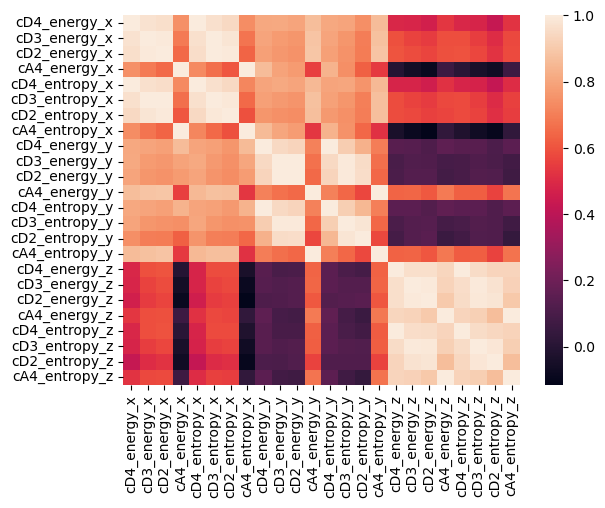

In [ ]:
import seaborn as sns
corr = dt.corr()
#print(corr.columns.values)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
corr.style.background_gradient(cmap='coolwarm', axis=None)


In [ ]:
from sklearn.manifold import TSNE
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False,\
                   palette="Set1",markers=['s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 520 samples in 0.000s...
[t-SNE] Computed neighbors for 520 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 520 / 520
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.007s
[t-SNE] Iteration 50: error = 69.2662506, gradient norm = 0.5015624 (50 iterations in 0.076s)
[t-SNE] Iteration 100: error = 61.8438492, gradient norm = 0.4839470 (50 iterations in 0.062s)


/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Iteration 150: error = 56.8474998, gradient norm = 0.5145341 (50 iterations in 0.061s)
[t-SNE] Iteration 200: error = 55.8971024, gradient norm = 0.4893978 (50 iterations in 0.066s)
[t-SNE] Iteration 250: error = 56.1656990, gradient norm = 0.4875306 (50 iterations in 0.055s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.165699
[t-SNE] Iteration 300: error = 0.4183773, gradient norm = 0.0054644 (50 iterations in 0.052s)
[t-SNE] Iteration 350: error = 0.3253437, gradient norm = 0.0016082 (50 iterations in 0.055s)
[t-SNE] Iteration 400: error = 0.2928217, gradient norm = 0.0004849 (50 iterations in 0.054s)
[t-SNE] Iteration 450: error = 0.2752442, gradient norm = 0.0004775 (50 iterations in 0.048s)
[t-SNE] Iteration 500: error = 0.2640486, gradient norm = 0.0004989 (50 iterations in 0.055s)
[t-SNE] Iteration 550: error = 0.2534836, gradient norm = 0.0003394 (50 iterations in 0.052s)
[t-SNE] Iteration 600: error = 0.2439501, gradient norm = 0.0003262 (50 i

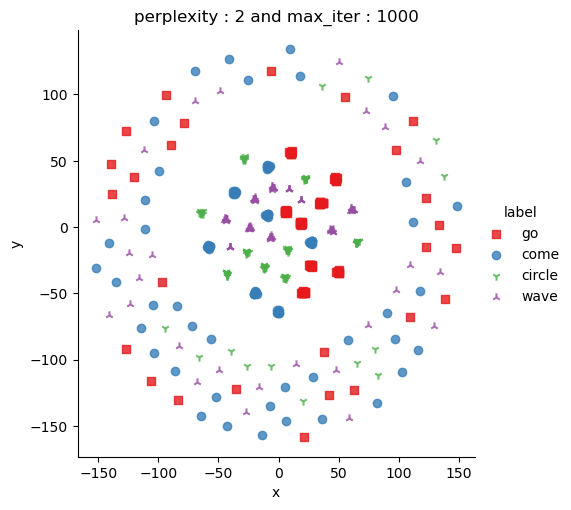

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 520 samples in 0.000s...
[t-SNE] Computed neighbors for 520 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 520 / 520
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 64.6851196, gradient norm = 0.4960497 (50 iterations in 0.073s)
[t-SNE] Iteration 100: error = 56.0476036, gradient norm = 0.4886380 (50 iterations in 0.065s)


/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Iteration 150: error = 52.4802094, gradient norm = 0.4988710 (50 iterations in 0.064s)
[t-SNE] Iteration 200: error = 49.8722839, gradient norm = 0.4949583 (50 iterations in 0.071s)
[t-SNE] Iteration 250: error = 49.1716690, gradient norm = 0.4948376 (50 iterations in 0.056s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.171669
[t-SNE] Iteration 300: error = 0.4703454, gradient norm = 0.0023699 (50 iterations in 0.066s)
[t-SNE] Iteration 350: error = 0.2697941, gradient norm = 0.0078580 (50 iterations in 0.054s)
[t-SNE] Iteration 400: error = 0.1646088, gradient norm = 0.0032287 (50 iterations in 0.053s)
[t-SNE] Iteration 450: error = 0.1517820, gradient norm = 0.0011898 (50 iterations in 0.045s)
[t-SNE] Iteration 500: error = 0.1453032, gradient norm = 0.0002371 (50 iterations in 0.043s)
[t-SNE] Iteration 550: error = 0.1404615, gradient norm = 0.0002936 (50 iterations in 0.045s)
[t-SNE] Iteration 600: error = 0.1376850, gradient norm = 0.0001983 (50 i

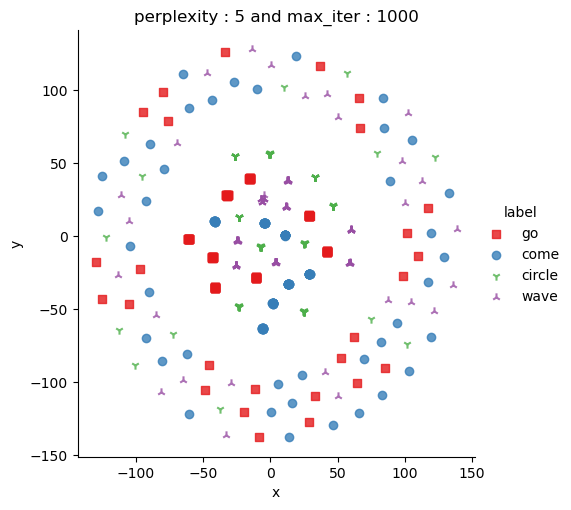

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 520 samples in 0.000s...
[t-SNE] Computed neighbors for 520 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 520 / 520
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.007s
[t-SNE] Iteration 50: error = 60.4420853, gradient norm = 0.5090616 (50 iterations in 0.066s)
[t-SNE] Iteration 100: error = 53.7339249, gradient norm = 0.4802233 (50 iterations in 0.058s)
[t-SNE] Iteration 150: error = 47.1378937, gradient norm = 0.5349942 (50 iterations in 0.057s)


/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Iteration 200: error = 46.7203560, gradient norm = 0.5168236 (50 iterations in 0.060s)
[t-SNE] Iteration 250: error = 45.8038597, gradient norm = 0.5098946 (50 iterations in 0.059s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.803860
[t-SNE] Iteration 300: error = 0.2318744, gradient norm = 0.0080855 (50 iterations in 0.055s)
[t-SNE] Iteration 350: error = 0.1524229, gradient norm = 0.0005313 (50 iterations in 0.056s)
[t-SNE] Iteration 400: error = 0.1235568, gradient norm = 0.0002877 (50 iterations in 0.054s)
[t-SNE] Iteration 450: error = 0.1084326, gradient norm = 0.0002047 (50 iterations in 0.052s)
[t-SNE] Iteration 500: error = 0.0984354, gradient norm = 0.0001510 (50 iterations in 0.045s)
[t-SNE] Iteration 550: error = 0.0928298, gradient norm = 0.0001412 (50 iterations in 0.060s)
[t-SNE] Iteration 600: error = 0.0870234, gradient norm = 0.0001285 (50 iterations in 0.068s)
[t-SNE] Iteration 650: error = 0.0841376, gradient norm = 0.0001092 (50 it

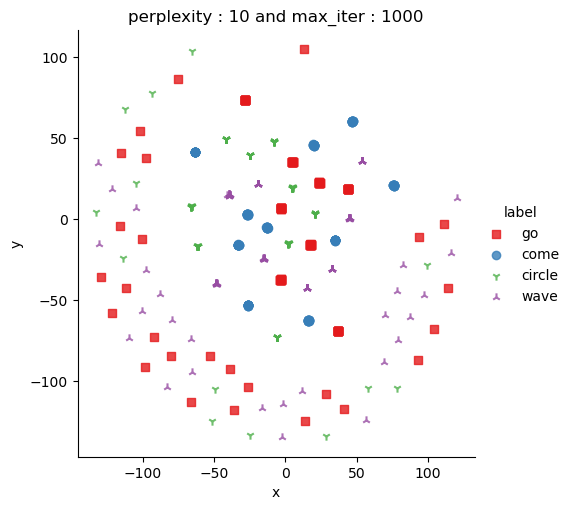

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 520 samples in 0.000s...
[t-SNE] Computed neighbors for 520 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 520 / 520
[t-SNE] Mean sigma: 13550.498831
[t-SNE] Computed conditional probabilities in 0.009s
[t-SNE] Iteration 50: error = 57.4898224, gradient norm = 0.4935520 (50 iterations in 0.074s)
[t-SNE] Iteration 100: error = 50.4209213, gradient norm = 0.5006363 (50 iterations in 0.067s)


/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Iteration 150: error = 48.7730675, gradient norm = 0.4978829 (50 iterations in 0.062s)
[t-SNE] Iteration 200: error = 46.7936287, gradient norm = 0.5067549 (50 iterations in 0.069s)
[t-SNE] Iteration 250: error = 46.1635513, gradient norm = 0.4993468 (50 iterations in 0.061s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.163551
[t-SNE] Iteration 300: error = 0.1282981, gradient norm = 0.0009643 (50 iterations in 0.057s)
[t-SNE] Iteration 350: error = 0.0594662, gradient norm = 0.0002055 (50 iterations in 0.055s)
[t-SNE] Iteration 400: error = 0.0412551, gradient norm = 0.0000978 (50 iterations in 0.052s)
[t-SNE] Iteration 450: error = 0.0342751, gradient norm = 0.0000648 (50 iterations in 0.054s)
[t-SNE] Iteration 500: error = 0.0301991, gradient norm = 0.0000516 (50 iterations in 0.054s)
[t-SNE] Iteration 550: error = 0.0266378, gradient norm = 0.0000633 (50 iterations in 0.065s)
[t-SNE] Iteration 600: error = 0.0219371, gradient norm = 0.0000404 (50 i

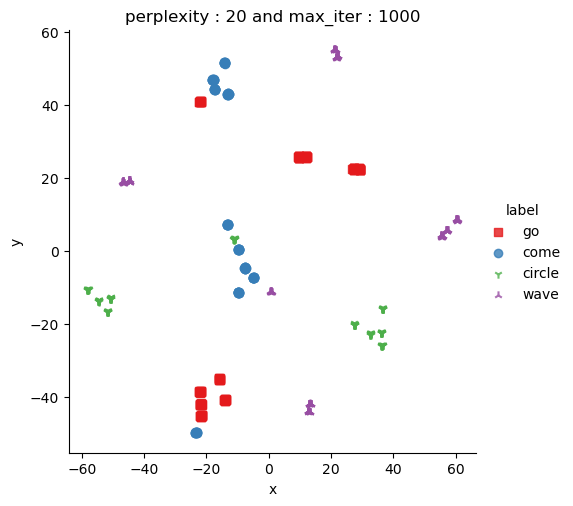

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 520 samples in 0.000s...
[t-SNE] Computed neighbors for 520 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 520 / 520
[t-SNE] Mean sigma: 29142.604260
[t-SNE] Computed conditional probabilities in 0.023s
[t-SNE] Iteration 50: error = 48.4602966, gradient norm = 0.5028515 (50 iterations in 0.088s)
[t-SNE] Iteration 100: error = 46.1684837, gradient norm = 0.4674852 (50 iterations in 0.070s)


/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Iteration 150: error = 44.6668015, gradient norm = 0.4992564 (50 iterations in 0.085s)
[t-SNE] Iteration 200: error = 45.0988541, gradient norm = 0.4608677 (50 iterations in 0.074s)
[t-SNE] Iteration 250: error = 43.8247299, gradient norm = 0.4693949 (50 iterations in 0.073s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.824730
[t-SNE] Iteration 300: error = 0.0959322, gradient norm = 0.0009461 (50 iterations in 0.060s)
[t-SNE] Iteration 350: error = 0.0711905, gradient norm = 0.0002258 (50 iterations in 0.072s)
[t-SNE] Iteration 400: error = 0.0650084, gradient norm = 0.0001309 (50 iterations in 0.065s)
[t-SNE] Iteration 450: error = 0.0621587, gradient norm = 0.0001379 (50 iterations in 0.061s)
[t-SNE] Iteration 500: error = 0.0600020, gradient norm = 0.0001014 (50 iterations in 0.070s)
[t-SNE] Iteration 550: error = 0.0508777, gradient norm = 0.0000755 (50 iterations in 0.060s)
[t-SNE] Iteration 600: error = 0.0414409, gradient norm = 0.0001676 (50 i

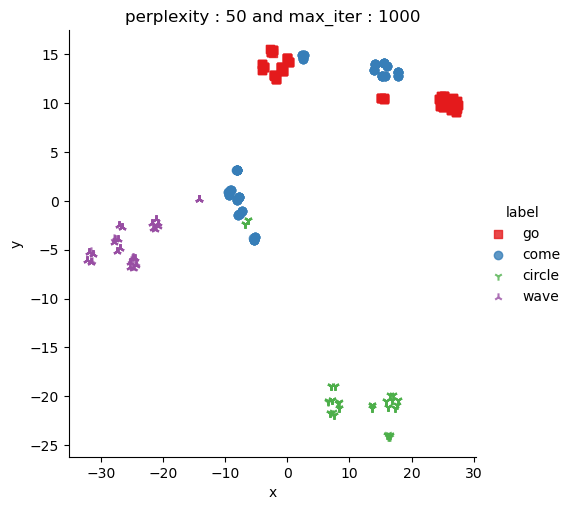

Done


In [ ]:
X_pre_tsne = dt.iloc[:, :-1]
y_pre_tsne = dt['label']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(24,1)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(4, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               3200      
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 3,716
Trainable params: 3,716
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
def prepare_targets(y_train, y_test):
 le = preprocessing.LabelEncoder()
 le.fit(y_train)
 y_train_enc = le.transform(y_train)
 y_test_enc = le.transform(y_test)
 return y_train_enc, y_test_enc

In [ ]:
X = dt.iloc[:, :-1]
y = dt['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train

cD4_energy_x  cD3_energy_x  cD2_energy_x   cA4_energy_x  cD4_entropy_x  \
396  41559.823376   9853.767287   2704.128399  127945.216670  278803.535709   
38    5793.881007   2590.873668    720.741260   16406.530350   28175.402826   
325  22385.917511   6815.672805   1830.315886   60627.445360  133026.700213   
198   4975.627589   2005.044565    589.017348    7267.504498   23522.580789   
302  25179.794793   8891.081831   2651.756821   61261.615337  155026.058860   
..            ...           ...           ...            ...            ...   
71    1644.225655    609.977281    206.793844    3891.788502    6207.741439   
106   5927.885570   2452.618544    748.263812   14575.799783   28699.227007   
270  15096.093991   5646.616910   1690.072511   43960.134184   86069.640315   
435   5910.408113   1662.711762    450.705274   53584.861769   26545.365443   
102   2262.226859    685.985620    230.386120    3462.075733    8802.038175   

     cD3_entropy_x  cD2_entropy_x  cA4_entropy_x  cD4_energy_y  cD3_energy_y  \
396   45645.779133    7349.807582   1.011736e+06   7005.639989   3619.764348   
38     8993.411931    1127.804483   9.432747e+04   2061.244554    786.957795   
325   28275.706465    3916.384241   4.283710e+05   2414.396602    688.123620   
198    6576.077532     783.259169   3.677567e+04   1174.643496    387.602202   
302   40223.730182    7178.921778   4.304368e+05   4261.081030   1202.895176   
..             ...            ...            ...           ...           ...   
71     1250.983128      61.452534   1.664059e+04    626.063920    213.667565   
106    8687.060541    1282.759882   8.293022e+04   1955.038087    877.421427   
270   23434.916851    4140.850859   2.919703e+05   5172.171611   1546.655237   
435    4484.697624     316.194100   3.694348e+05   3048.405744    902.727654   
102    1605.036430     114.777322   1.451100e+04    637.419808    209.583656   

     ...  cD2_entropy_y  cA4_entropy_y  cD4_energy_z  cD3_energy_z  \
396  ...    1571.510033  323422.662233   5319.644225   2497.053592   
38   ...     100.887529   55685.449909   9071.416904   3515.830931   
325  ...      21.692081  164425.445877  15761.404079   5397.034068   
198  ...      30.298865   14526.740437   4309.936286   1560.818674   
302  ...     284.780441  220968.271240  20234.851112   6359.758493   
..   ...            ...            ...           ...           ...   
71   ...      42.863398    6505.689399   3313.037356   1301.574072   
106  ...     167.557433   60741.639286  10269.011521   3714.314388   
270  ...     428.771059  320400.900766  15163.798148   4619.330254   
435  ...       7.479832   48174.966602    400.857252    169.248312   
102  ...      40.046070    3313.852536   2250.850348   1055.216256   

     cD2_energy_z  cA4_energy_z  cD4_entropy_z  cD3_entropy_z  cD2_entropy_z  \
396    722.446769  19547.838192   27105.042218    8721.094235    1119.240139   
38    1002.030140  17321.925537   48184.048516   13151.529840    1853.083328   
325   1422.230039  61691.438667   89844.163465   21166.145539    2729.673626   
198    453.628669  10488.590903   20234.474562    4562.938869     485.934608   
302   1717.712381  57390.709234  120275.132655   26055.707473    3686.941773   
..            ...           ...            ...            ...            ...   
71     352.784610   7380.508933   14291.337934    3794.885732     336.248085   
106   1139.212646  13499.339167   56546.934290   14804.503038    2537.098541   
270   1301.228731  45266.249729   84350.361659   17640.726715    2472.422956   
435     43.799997   1560.750131     869.148051     113.943489      59.028764   
102    359.961541   4785.603469    9238.997274    2777.993958     336.084985   

     cA4_entropy_z  
396  112754.333105  
38    98397.321945  
325  428518.704080  
198   57507.233945  
302  398608.642544  
..             ...  
71    36722.242474  
106   73571.998668  
270  298678.693317  
435    5277.925771  
102   21225.593802  

[260 rows x 24 columns]

In [ ]:
y_train, y_test = prepare_targets(y_train, y_test)

In [ ]:
y_train = pd.get_dummies(y_train)
y_train

0  1  2  3
0    0  0  0  1
1    0  0  1  0
2    1  0  0  0
3    0  1  0  0
4    1  0  0  0
..  .. .. .. ..
255  0  0  1  0
256  0  0  1  0
257  1  0  0  0
258  0  0  0  1
259  0  0  1  0

[260 rows x 4 columns]

In [ ]:
history = model.fit(X_train, y_train, epochs=80, batch_size=10)

Epoch 1/80
26/26 [==============================] - 0s 674us/step - loss: 0.6277 - accuracy: 0.1885
Epoch 2/80
26/26 [==============================] - 0s 720us/step - loss: 0.5340 - accuracy: 0.3923
Epoch 3/80
26/26 [==============================] - 0s 834us/step - loss: 0.4942 - accuracy: 0.5423
Epoch 4/80
26/26 [==============================] - 0s 963us/step - loss: 0.4615 - accuracy: 0.5346
Epoch 5/80
26/26 [==============================] - 0s 942us/step - loss: 0.4350 - accuracy: 0.5731
Epoch 6/80
26/26 [==============================] - 0s 708us/step - loss: 0.4108 - accuracy: 0.6423
Epoch 7/80
26/26 [==============================] - 0s 733us/step - loss: 0.3903 - accuracy: 0.6808
Epoch 8/80
26/26 [==============================] - 0s 811us/step - loss: 0.3716 - accuracy: 0.7231
Epoch 9/80
26/26 [==============================] - 0s 690us/step - loss: 0.3571 - accuracy: 0.7654
Epoch 10/80
26/26 [==============================] - 0s 684us/step - loss: 0.3425 - accuracy: 0.7500

In [ ]:
y_pred = model.predict(X_test)

9/9 [==============================] - 0s 623us/step


In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib
from sklearn import metrics
def perform_model_ann(y_test, y_pred, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Reds):
    
    
    # to store results at various phases
    results = dict()
    pred = list()
    for i in y_pred:
        pred.append(np.argmax(i))
    print('Done \n \n')
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    fig, ax = plot_confusion_matrix(conf_mat=cm, class_names=class_labels)
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    

Done 
 

---------------------
|      Accuracy      |
---------------------

    1.0


--------------------
| Confusion Matrix |
--------------------

 [[59  0  0  0]
 [ 0 62  0  0]
 [ 0  0 73  0]
 [ 0  0  0 66]]
-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00        66

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260



{'predicted': array([[0.8338011 , 0.00256545, 0.0530236 , 0.0079734 ],
        [0.00559073, 0.49173915, 0.65215003, 0.00100606],
        [0.2829967 , 0.10206255, 0.5290022 , 0.00223548],
        ...,
        [0.77493745, 0.00616865, 0.3642258 , 0.0049877 ],
        [0.79041827, 0.03512951, 0.1561876 , 0.00306151],
        [0.39478138, 0.71177256, 0.01284463, 0.00511566]], dtype=float32),
 'accuracy': 1.0,
 'confusion_matrix': array([[59,  0,  0,  0],
        [ 0, 62,  0,  0],
        [ 0,  0, 73,  0],
        [ 0,  0,  0, 66]]),
 'classification_report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        59\n           1       1.00      1.00      1.00        62\n           2       1.00      1.00      1.00        73\n           3       1.00      1.00      1.00        66\n\n    accuracy                           1.00       260\n   macro avg       1.00      1.00      1.00       260\nweighted avg       1.00      1.00      1.00      

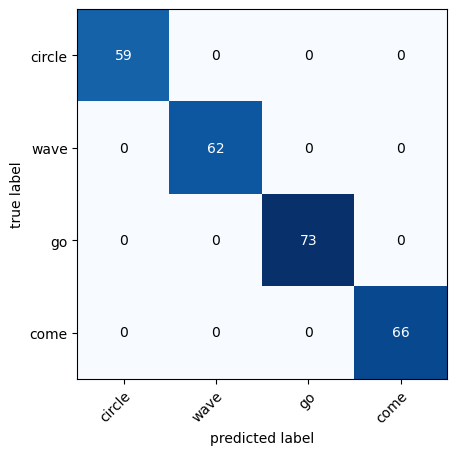

In [ ]:
# metrics.accuracy_score(y_true=y_test,y_pred=pred)
perform_model_ann(y_test, y_pred, ['circle', 'wave', 'go', 'come'])